# 기계학습과 딥러닝 6조 Modeling Code

# data 불러오기
- import version 설정(터미널에서 지정)
    * pip install scikit-learn==1.1
    * pip install imbalanced-learn==0.9



## data 확인
데이터 출처: Kaggle
https://www.kaggle.com/code/joshuaswords/awesome-hr-data-visualization-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.ticker as mtick

# To ensure text placement and advanced grid layout
from matplotlib.gridspec import GridSpec

In [2]:
# aug_test에는 target값이 없어서 aug_train만 사용할 예정
## 그리고 aug_train에서 train, validation, test set을 6:2:2로 나눌 예정
aug_train = pd.read_csv('data/aug_train.csv')

In [3]:
aug_train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [4]:
aug_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
aug_train.shape

(19158, 14)

### 결측치 확인
결측치가 꽤나 많은데 다 살리는 방향으로 갈 거다.
- enrollee_id                  0
- city                         0
- city_development_index       0
- gender                    4508
- relevent_experience          0
- enrolled_university        386
- education_level            460
- major_discipline          2813
- experience                  65
- company_size              5938
- company_type              6140
- last_new_job               423
- training_hours               0
- target                       0

In [6]:
aug_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
# Check for nulls : 결측치 비율 확인
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [8]:
# 결측치가 아예 없었던 데이터 10203개
# aug_train[aug_train.isnull().any(axis=1)]
aug_train.isna().sum(axis=1).astype(bool).sum()

10203

### 실수형, 문자형 변수

In [9]:
## 실수형, 문자형 변수
var_num = aug_train.select_dtypes(include=['float', 'int']).columns
var_obj = aug_train.select_dtypes(include=['object']).columns

print('features with dtype float : ', len(var_num),'개')
print(var_num)
print('features with dtype object : ', len(var_obj),'개')
print(var_obj)

features with dtype float :  4 개
Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')
features with dtype object :  10 개
Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


In [10]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

#### 실수형 변수
- 실수형 변수들은 결측치가 없다!

In [11]:
group_num.isna().sum()

enrollee_id               0
city_development_index    0
training_hours            0
target                    0
dtype: int64

#### 범주형 자료 : categorical data 정리

In [12]:
group_obj.isna().sum()

city                      0
gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
dtype: int64

##### city
- city별로 one unique한 city_development_index 값을 가지기 때문에 city는 제거한다.

In [13]:
# Group by 'city' and calculate the number of unique 'city_development_index' values
unique_development_index_counts = aug_train.groupby('city')['city_development_index'].nunique().reset_index()

# Check if any city has more than one unique city_development_index value
cities_with_multiple_development_indices = unique_development_index_counts[unique_development_index_counts['city_development_index'] > 1]

# Display the results
print(f"Cities with more than one unique 'city_development_index':\n{cities_with_multiple_development_indices}")

# Display the unique counts for all cities
print(f"\nUnique 'city_development_index' counts for all cities:\n{unique_development_index_counts}")

Cities with more than one unique 'city_development_index':
Empty DataFrame
Columns: [city, city_development_index]
Index: []

Unique 'city_development_index' counts for all cities:
         city  city_development_index
0      city_1                       1
1     city_10                       1
2    city_100                       1
3    city_101                       1
4    city_102                       1
..        ...                     ...
118   city_93                       1
119   city_94                       1
120   city_97                       1
121   city_98                       1
122   city_99                       1

[123 rows x 2 columns]


In [14]:
aug_train['city'].unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [15]:
aug_train.drop(columns=['city'],inplace=True)

##### last_new_job 변수
결측치 처리 방법
1. (aug_train['company_type'].isna()) & (aug_train['company_size'].isna()) 조건에 맞는 행의 'last_new_job'을 'never'로 채움
    - never의 의미는 한 번도 직장을 구해보지 않았다는 의미다.
2. 이후의 남은 결측치는 NaN       230 => Unknown으로 채울 것

In [16]:
aug_train[(aug_train['company_type'].isna())&(aug_train['company_size'].isna())]['last_new_job'].value_counts(dropna=False)

1        2006
never    1518
>4        685
2         594
NaN       193
4         191
3         173
Name: last_new_job, dtype: int64

In [17]:
# 필터링 조건에 맞는 행의 'last_new_job'을 'never'로 채움
mask = (aug_train['company_type'].isna()) & (aug_train['company_size'].isna())
aug_train.loc[mask, 'last_new_job'] = aug_train.loc[mask, 'last_new_job'].fillna('never')

In [18]:
aug_train[(aug_train['company_type'].isna())&(aug_train['company_size'].isna())]['last_new_job'].value_counts(dropna=False)

1        2006
never    1711
>4        685
2         594
4         191
3         173
Name: last_new_job, dtype: int64

In [19]:
aug_train['last_new_job'].value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2645
4        1029
3        1024
NaN       230
Name: last_new_job, dtype: int64

- NaN 230개는 나중에 experience 결측치 처리할 때 다시 보기

In [20]:
aug_train['last_new_job'].fillna('Unknown',inplace=True)

In [21]:
### 보기 좋게만 만들기
aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer


In [22]:
aug_train['last_new_job'].value_counts(dropna=False)

1          8040
>4         3290
2          2900
Never      2645
4          1029
3          1024
Unknown     230
Name: last_new_job, dtype: int64

##### experience 변수
1. 변수 value 값 처리
    - x: '0' if x == '<1' else x
        - 대신, 'experience' 열을 기준으로 'experience_under_1' 열 생성
    - x: '0' if x == '>20' else x
        - 대신, 'experience' 열을 기준으로 'experience_over_20' 열 생성
2. 결측치 : NaN      65개 발생
    - 'experience' 열을 기준으로 x가 결측치면 1, 아니면 0으로 'experience_Unknown' 열 생성
    - 'experience' 열에서 결측치는 '0'으로 대체


In [23]:
aug_train['experience'].value_counts(dropna=False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [24]:
# 'experience' 열을 기준으로 'experience_under_1' 열 생성
aug_train['experience_under_1'] = aug_train['experience'].apply(lambda x: 1 if x == '<1' else 0)

# 'experience' 열을 기준으로 'experience_over_20' 열 생성
aug_train['experience_over_20'] = aug_train['experience'].apply(lambda x: 1 if x == '>20' else 0)

In [25]:
aug_train[aug_train['experience']=='0']['experience_over_20'].value_counts()

Series([], Name: experience_over_20, dtype: int64)

In [26]:
aug_train[aug_train['experience']=='0']['experience_under_1'].value_counts()

Series([], Name: experience_under_1, dtype: int64)

In [27]:
aug_train['experience_over_20'].value_counts()

0    15872
1     3286
Name: experience_over_20, dtype: int64

In [28]:
aug_train['experience_under_1'].value_counts()

0    18636
1      522
Name: experience_under_1, dtype: int64

In [29]:
# 'experience' 열에서 '<1'을 '0'으로 대체
aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '<1' else x)

# 'experience' 열에서 '>20'을 '0'으로 대체
aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '>20' else x)

In [30]:
# 'experience' 열을 기준으로 x가 결측치면 1, 아니면 0으로 'experience_Unknown' 열 생성
aug_train['experience_Unknown'] = aug_train['experience'].apply(lambda x: 1 if pd.isna(x) else 0)

# 'experience' 열에서 결측치는 '0'으로 대체
aug_train['experience'] = aug_train['experience'].fillna('0')

In [31]:
aug_train['experience'].value_counts(dropna=False)

0     3873
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64

In [32]:
aug_train['experience_Unknown'].value_counts(dropna=False)

0    19093
1       65
Name: experience_Unknown, dtype: int64

##### company 변수
###### company_size 변수 
- 결측치 :NaN          5938 개,
###### company_type 변수 
- 결측치 :NaN                    6140개,
1. (1711개) company 변수 둘 다 결측치가 있고, last_new_job ='never'인 경우에는 company_type, company_size 둘 다 'Unemployed'
    - last_new_job : 이전 직업과 현재 직업의 몇 년 차이
    - 앞으로 다닐 회사가 아니라, last_new_job가 'never'인 즉, 이전회사가 없었던 얘들은 unemployed 된 애들이라고 생각함

2. 나머지는 'Unknown'으로 만들기
- aug_train['company_size'].fillna('Unknown',inplace=True)
- aug_train['company_type'].fillna('Unknown',inplace=True)
    - 결측치 겹치는 개 : 5360개 -> 얘네는 last_new_job과는 공통점이 없다.
    - company 정보가 현재 회사를 다니고 있고, 회사를 다니는 중에 교육을 받는다.

In [33]:
aug_train['company_size'].value_counts(dropna=False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [34]:
aug_train['company_type'].value_counts(dropna=False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [35]:
aug_train[(aug_train['last_new_job']=='Never')&(aug_train['company_size'].isna())]['company_type'].value_counts(dropna=False)

NaN                    1711
Pvt Ltd                 246
Public Sector            12
Other                     3
NGO                       2
Early Stage Startup       1
Name: company_type, dtype: int64

In [36]:
aug_train[(aug_train['last_new_job']=='Never')&(aug_train['company_type'].isna())]['company_size'].value_counts(dropna=False)

NaN          1711
50-99          17
100-500        17
500-999        10
10/49           9
10000+          8
<10             6
1000-4999       6
5000-9999       4
Name: company_size, dtype: int64

* Last_new_job이 never이면서 company size가 결측인게 없음
* 마찬가지로 last_new_job이 never이면서 company_type이 결측인게 없음

In [37]:
# 필터링 조건 정의
mask = (aug_train['last_new_job']=='Never')&(aug_train['company_type'].isna())

# 'company_size'의 NaN 값을 'Unemployed'으로 채움
aug_train.loc[mask, 'company_size'] = aug_train.loc[mask, 'company_size'].fillna('Unemployed')

# 필터링 조건 정의
mask = (aug_train['last_new_job']=='Never')&(aug_train['company_size']=='Unemployed')
# 'company_type'의 NaN 값을 'Unemployed'으로 채움
aug_train.loc[mask, 'company_type'] = aug_train.loc[mask, 'company_type'].fillna('Unemployed')


In [38]:
print(aug_train['company_type'].value_counts(dropna=False))
print(aug_train['company_size'].value_counts(dropna=False))

Pvt Ltd                9817
NaN                    4429
Unemployed             1711
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
NaN           4227
50-99         3083
100-500       2571
10000+        2019
Unemployed    1711
10/49         1471
1000-4999     1328
<10           1308
500-999        877
5000-9999      563
Name: company_size, dtype: int64


In [39]:
# company_size 0으로 처리하는 걸로 바꿈.
aug_train['company_size'].fillna('0',inplace=True)
aug_train['company_type'].fillna('Unknown',inplace=True)

In [40]:
### 보기 좋게만 만들기
aug_train['company_size'] = aug_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

In [41]:
print(aug_train['company_type'].value_counts(dropna=False))
print(aug_train['company_size'].value_counts(dropna=False))

Pvt Ltd                9817
Unknown                4429
Unemployed             1711
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
0             4227
50-99         3083
100-500       2571
10000+        2019
Unemployed    1711
10-49         1471
1000-4999     1328
<10           1308
500-999        877
5000-9999      563
Name: company_size, dtype: int64


##### Gender variable
- 결측치와 Other이랑 합친다.

In [42]:
aug_train['gender'].fillna('Not provided',inplace=True)

In [43]:
aug_train['gender'].value_counts(dropna=False)

Male            13221
Not provided     4508
Female           1238
Other             191
Name: gender, dtype: int64

In [44]:
# 필터링 조건 수정: 'Not provided' 또는 'Other'
aug_train_gender = aug_train[(aug_train['gender'] == 'Not provided') | (aug_train['gender'] == 'Other')]
aug_train_gender['gender'].value_counts()

Not provided    4508
Other            191
Name: gender, dtype: int64

In [45]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

##### genderd의 'other'와 'not provided'의 분포 비교

수치형 데이터 시각화


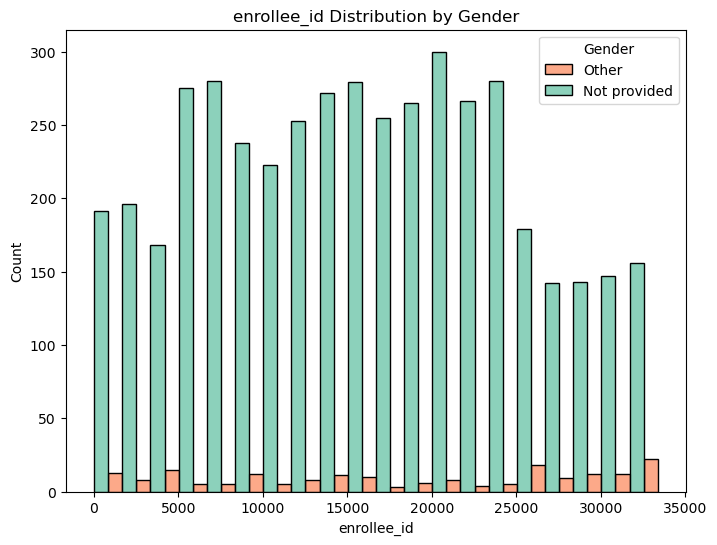

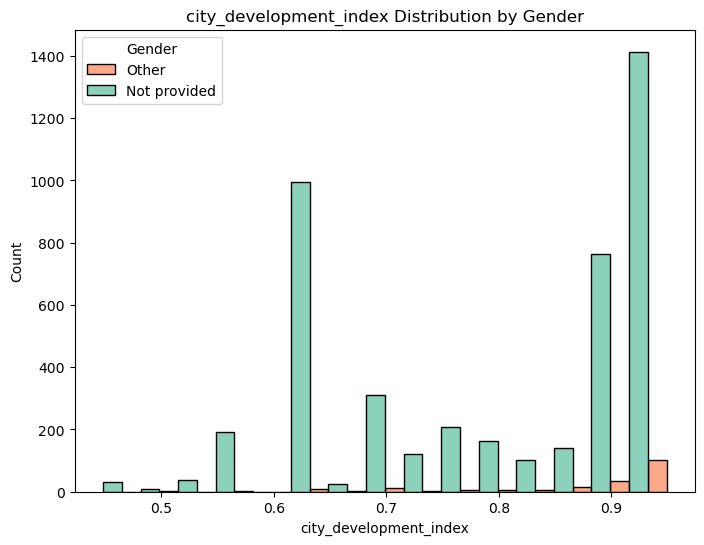

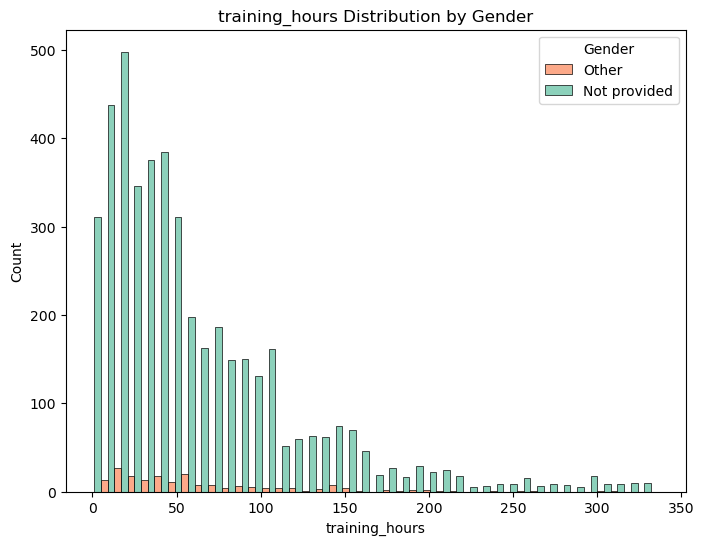

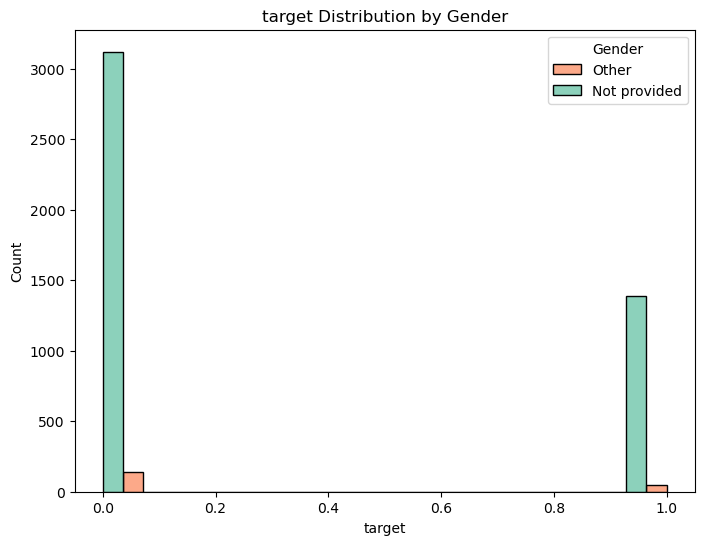

범주형 데이터 시각화


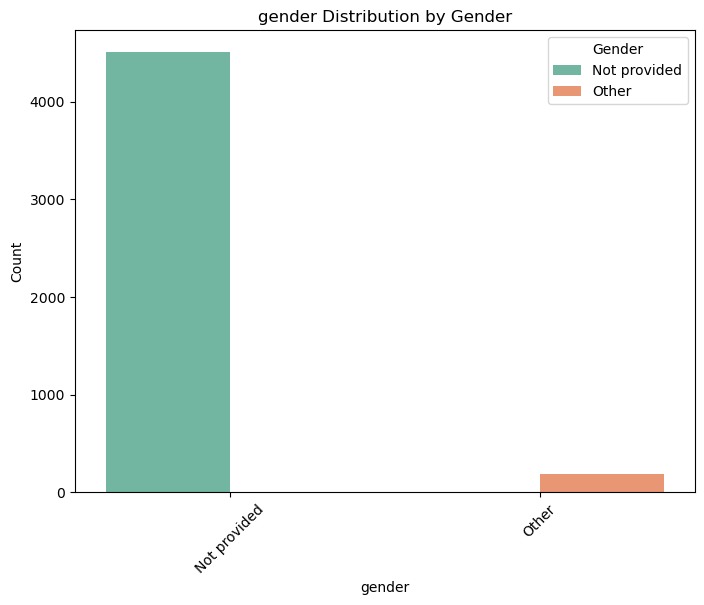

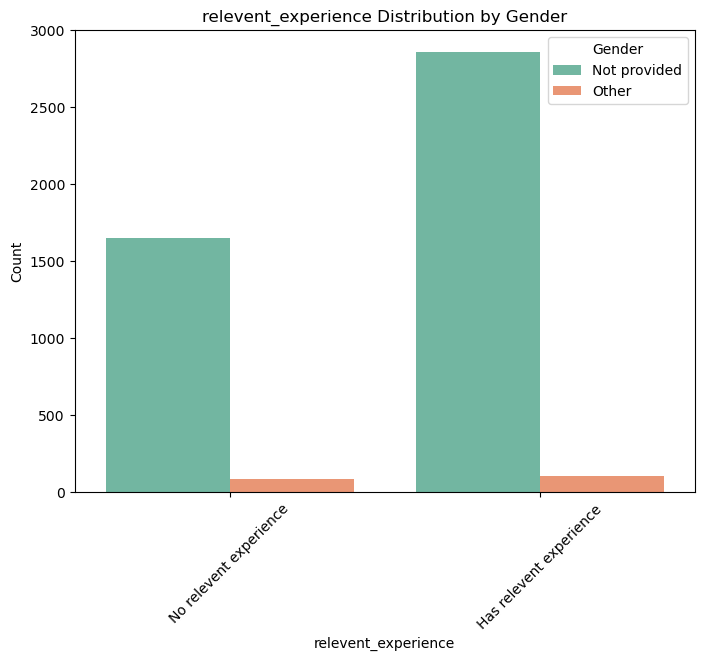

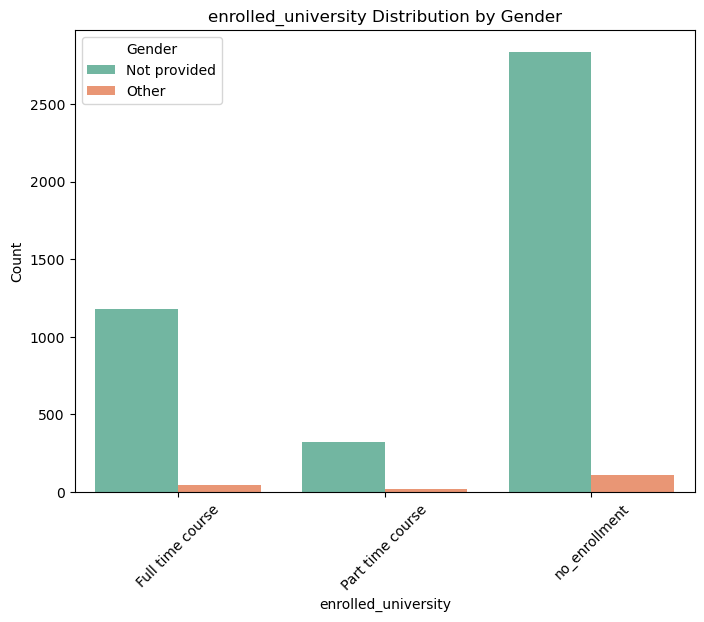

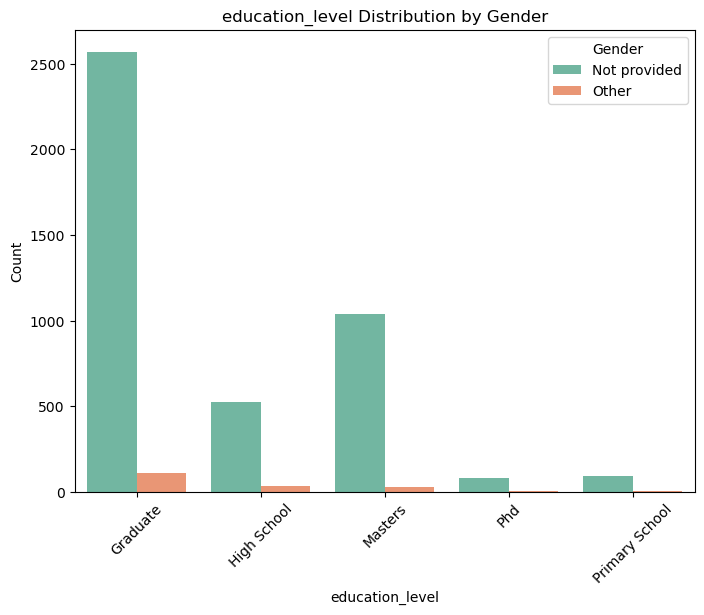

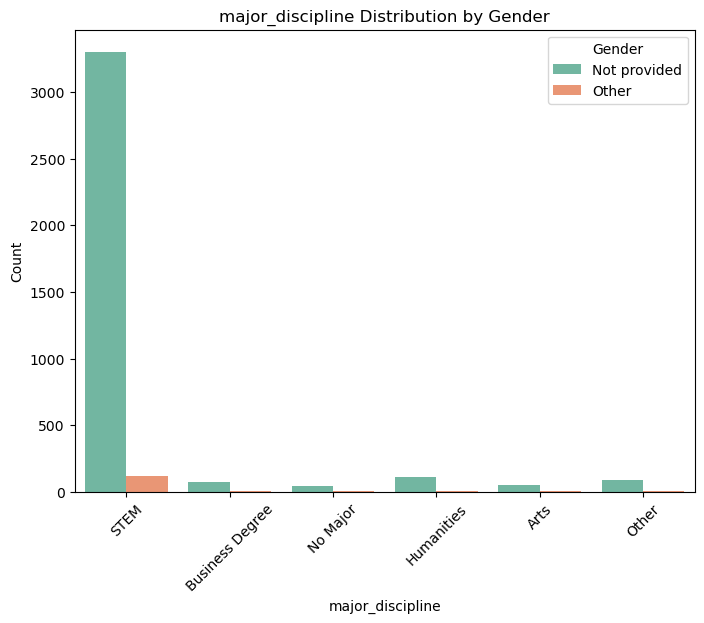

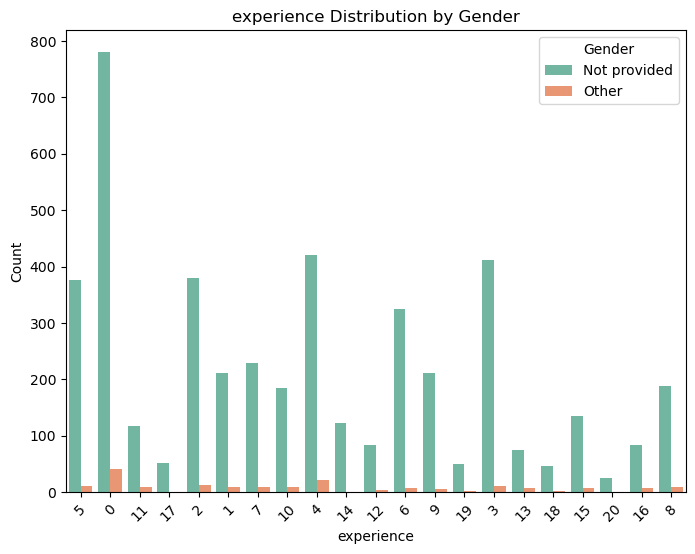

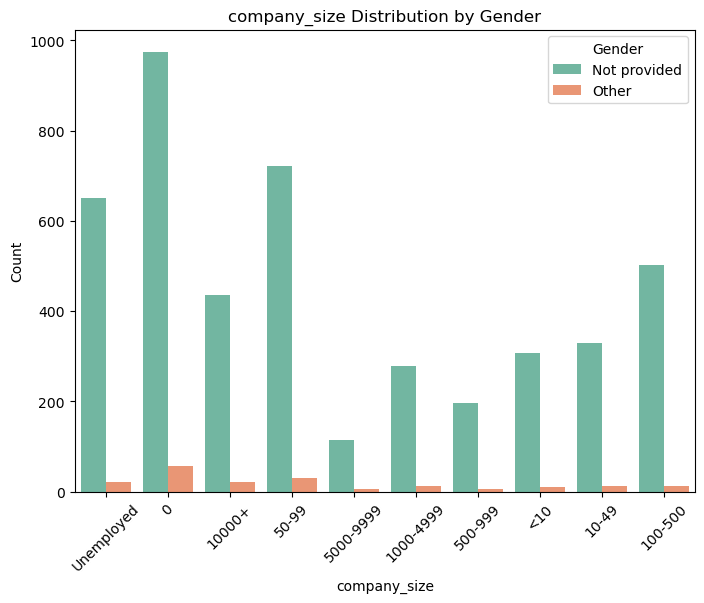

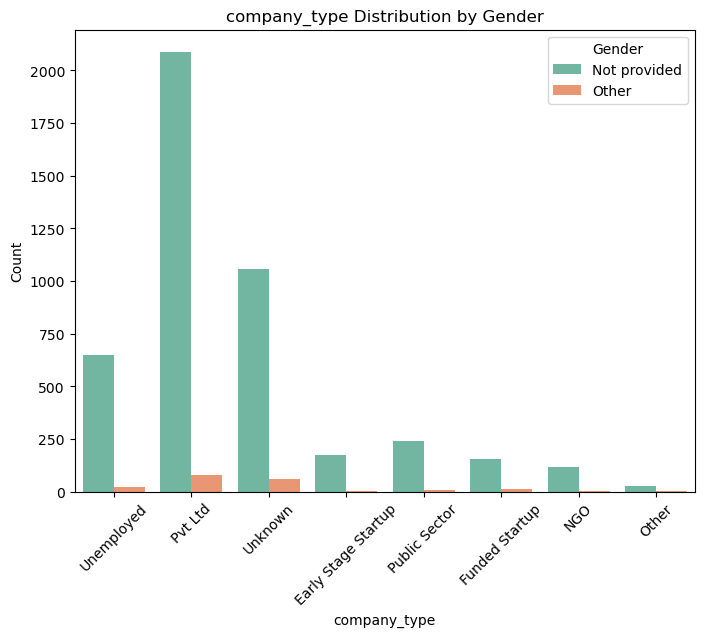

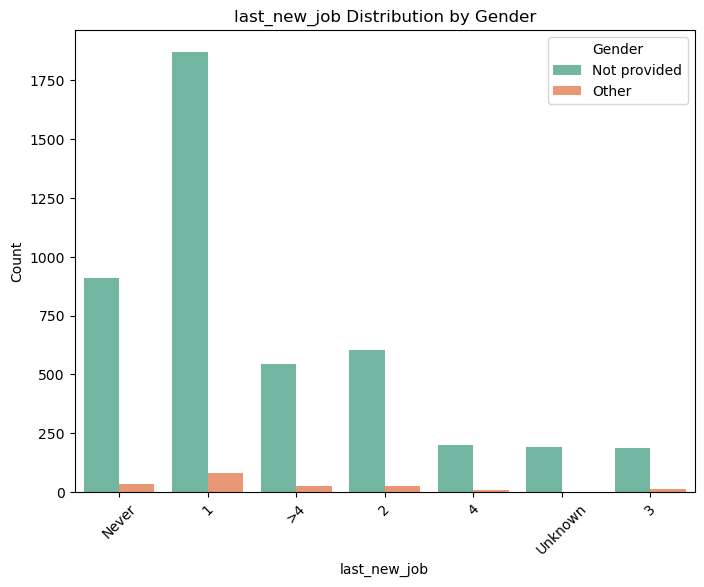

In [46]:
print('수치형 데이터 시각화')
# 수치형 데이터 시각화
for column in group_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_gender, x=column, hue='gender', multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by Gender')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Gender', labels=['Other', 'Not provided'])
    plt.show()

print('범주형 데이터 시각화')
# 범주형 데이터 시각화
for column in group_obj:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=aug_train_gender, x=column, hue='gender', palette='Set2')
    plt.title(f'{column} Distribution by Gender')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Gender', labels=['Not provided','Other'])
    plt.xticks(rotation=45)  # 범주형 데이터의 레이블이 길 경우 각도를 조정
    plt.show()


In [47]:
# 'gender'가 'Not provided'인 행의 'gender'를 'Other'로 변경
aug_train.loc[aug_train['gender'] == 'Not provided', 'gender'] = 'Other'

In [48]:
aug_train['gender'].value_counts(dropna=False)

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

##### Major variable
- 결측치와 Other이랑 합치려 했으나... education_level 에 분포의 차이가 있음
- 결측치는 'Unknown'으로, 'No Major'와 'Other' 도 각각 따로 가지고 가기로 결정

In [49]:
aug_train['major_discipline'].fillna('Unknown',inplace=True)

In [50]:
# 필터링 조건 수정: 'Unknown' 또는 'Other'
aug_train_major_discipline = aug_train[(aug_train['major_discipline'] == 'Unknown') | (aug_train['major_discipline'] == 'Other')]
aug_train_major_discipline['major_discipline'].value_counts(dropna= False)


Unknown    2813
Other       381
Name: major_discipline, dtype: int64

##### major dicipline의 'other'와 'unknown'의 분포 비교

In [51]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

수치형 데이터 시각화


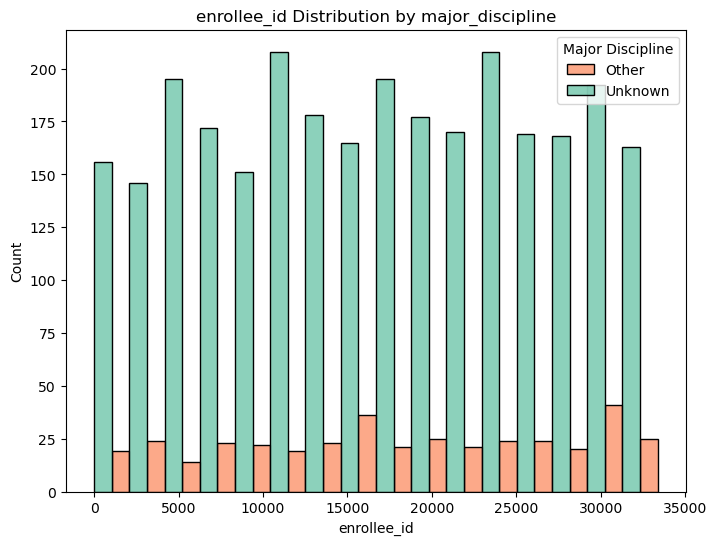

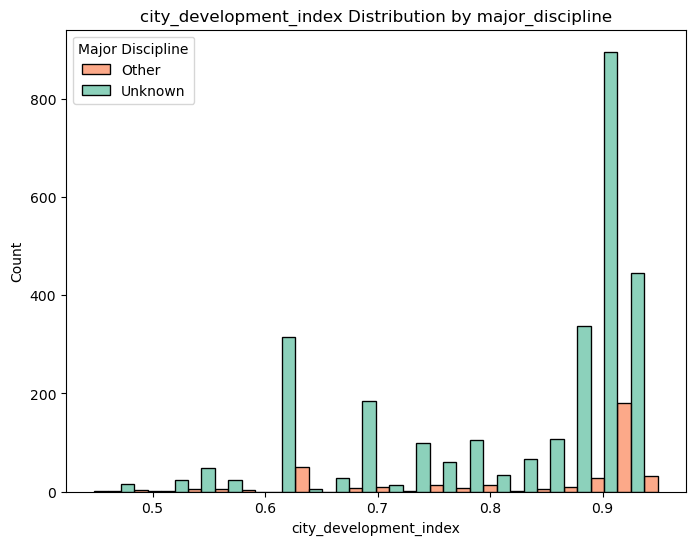

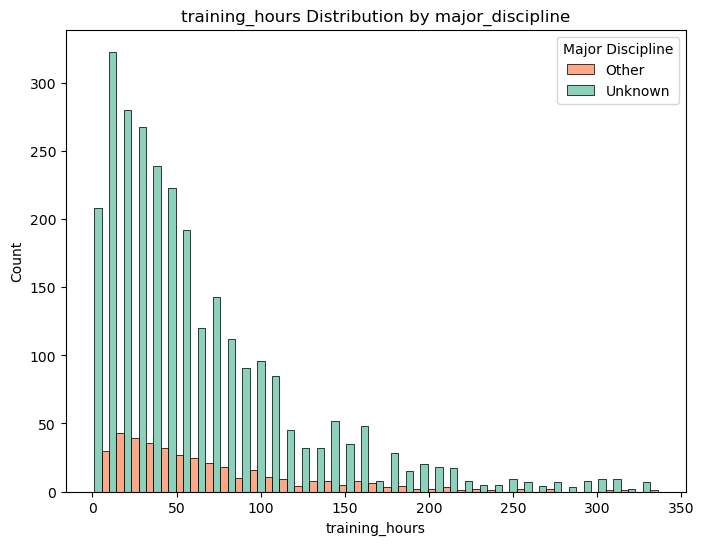

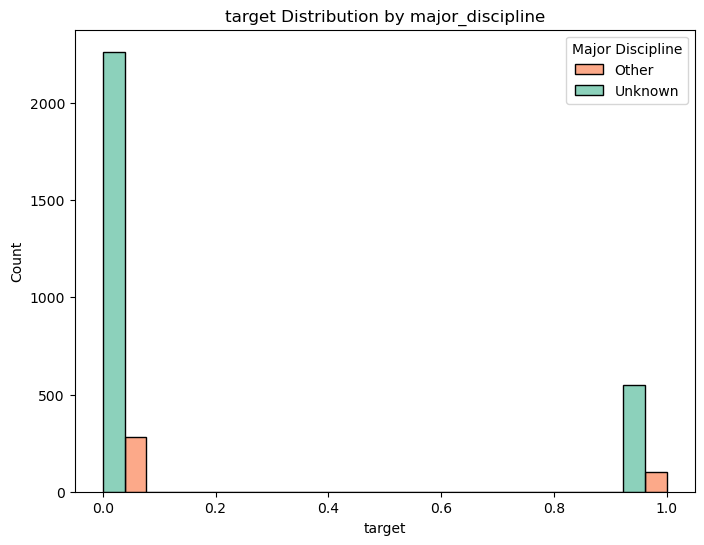

범주형 데이터 시각화


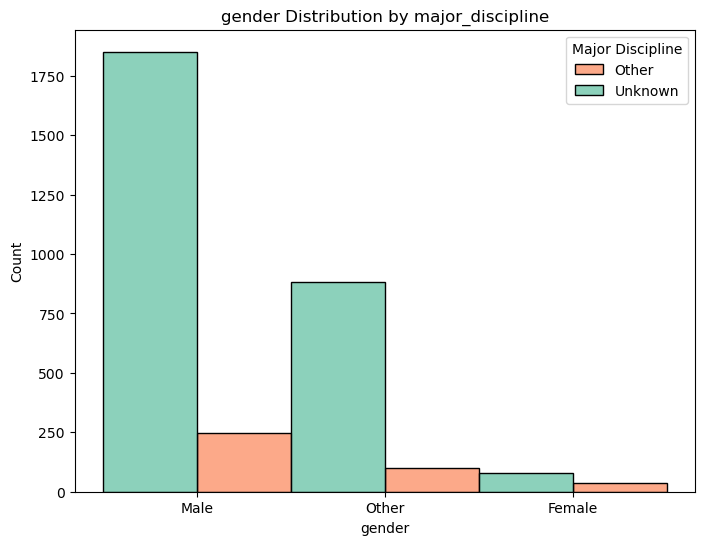

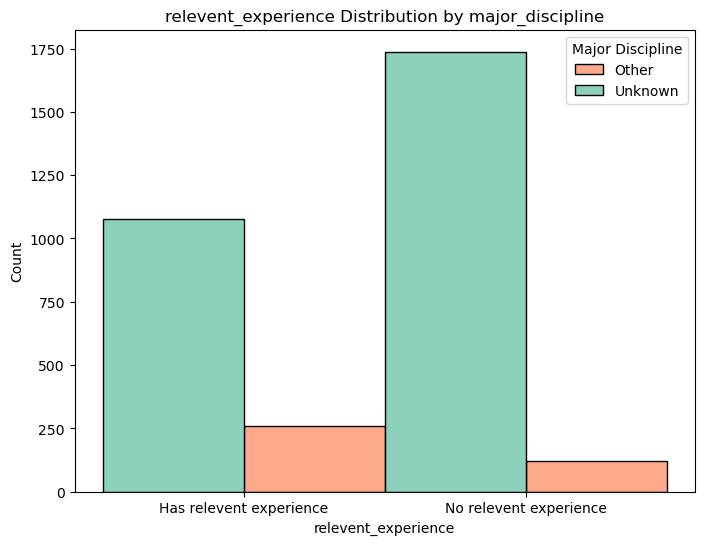

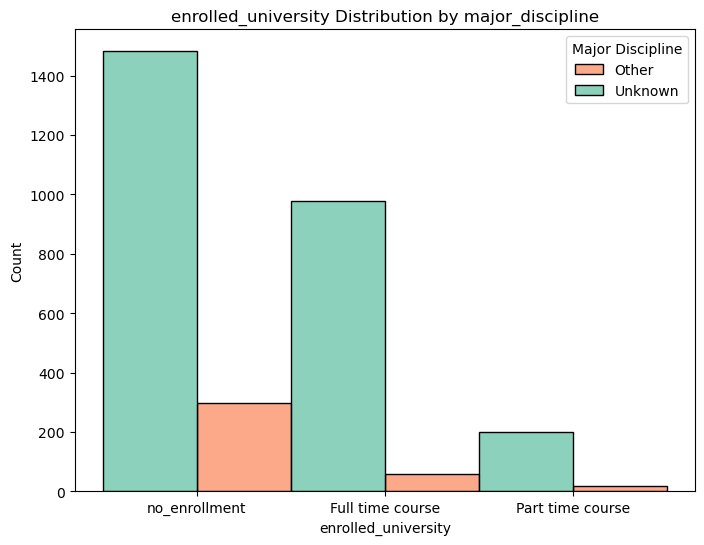

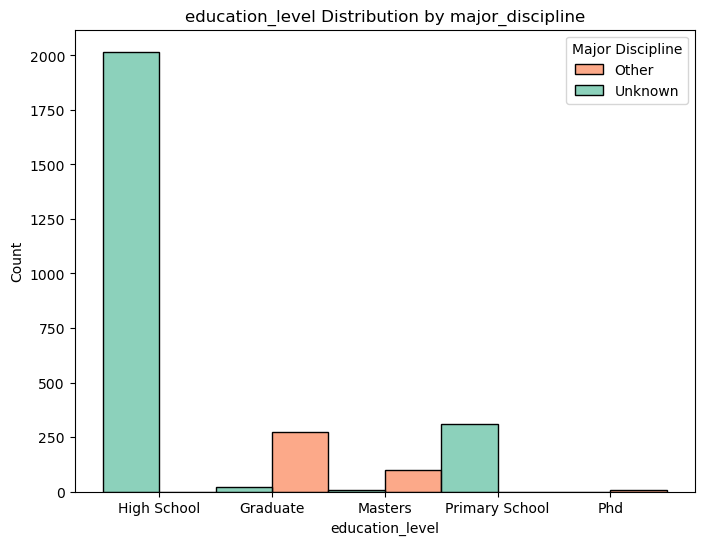

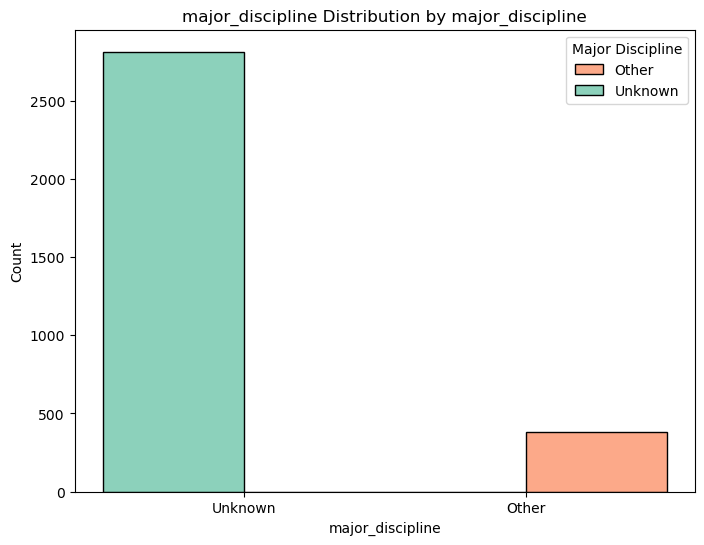

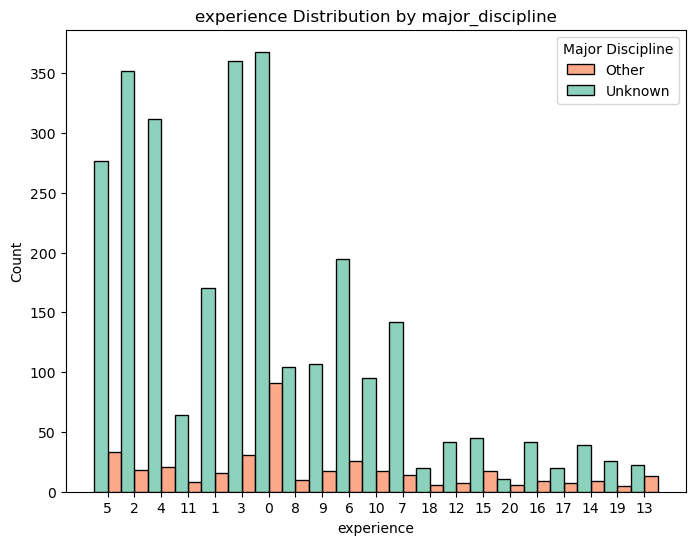

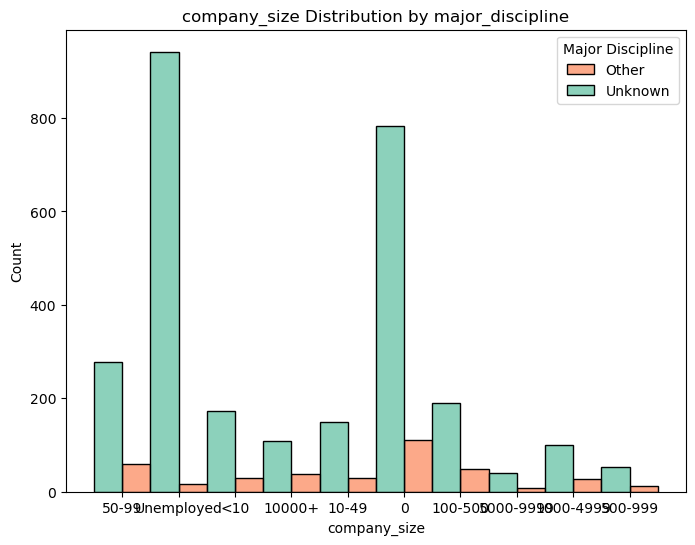

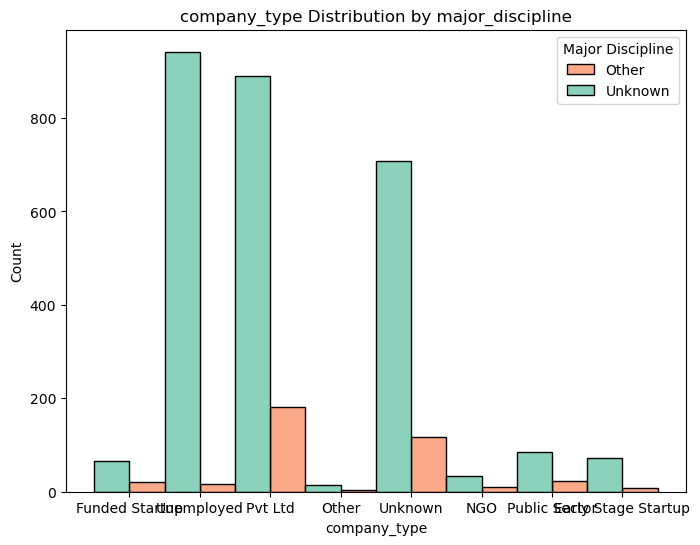

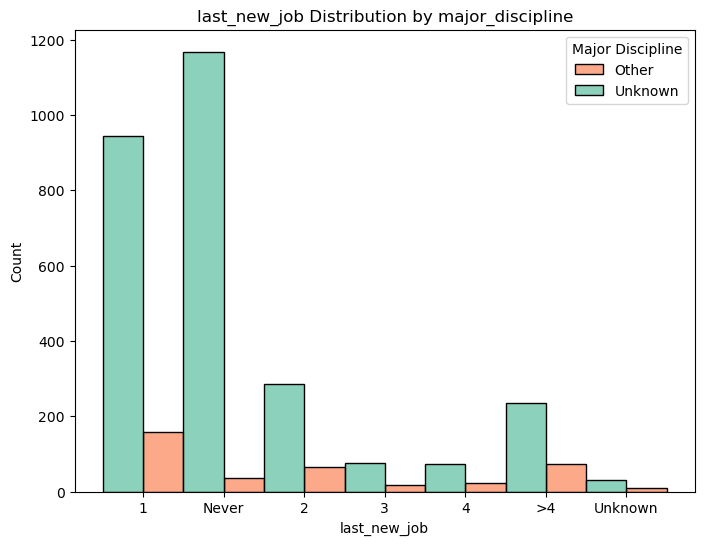

In [52]:
print('수치형 데이터 시각화')
# 수치형 데이터 시각화
for column in group_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_major_discipline, x=column, hue='major_discipline', multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by major_discipline')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Major Discipline', labels=['Other','Unknown'])
    plt.show()

print('범주형 데이터 시각화')
# 범주형 데이터 시각화
for column in group_obj:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_major_discipline, x=column, hue='major_discipline',multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by major_discipline')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Major Discipline', labels=['Other', 'Unknown'])
    plt.show()

In [53]:
aug_train['major_discipline'].value_counts(dropna=False)

STEM               14492
Unknown             2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

##### enrolled_university
- 결측치 : NaN                   386개(0.020148, 비율) => 'Unknown'으로

In [54]:
aug_train['enrolled_university'].value_counts(dropna=False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [55]:
aug_train[aug_train['education_level'].isnull()]['enrolled_university'].value_counts(dropna=False)

no_enrollment       270
NaN                 100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

In [56]:
### 보기 좋게만 만들기
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5353/3339035232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer


In [57]:
aug_train['enrolled_university'].fillna("Unknown", inplace=True)

In [58]:
aug_train['enrolled_university'].value_counts(dropna=False)

No Enrollment       13817
Full time course     3757
Part time course     1198
Unknown               386
Name: enrolled_university, dtype: int64

##### education_level
- 결측치 460개,           0.024011 ==> Unknown

In [59]:
aug_train['education_level'].value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [60]:
aug_train[aug_train['enrolled_university']=='Unknown']['education_level'].value_counts(dropna=False)

Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

In [61]:
aug_train.loc[aug_train['enrolled_university']=='no_enrollment','education_level'].value_counts(dropna=False)

Series([], Name: education_level, dtype: int64)

In [62]:
aug_train[aug_train['enrolled_university']=='No Enrollment']['education_level'].value_counts(dropna=False)

Graduate          8434
Masters           3547
High School        940
Phd                371
NaN                270
Primary School     255
Name: education_level, dtype: int64

In [63]:
aug_train['education_level'].fillna("Unknown", inplace=True)

In [64]:
aug_train['education_level'].value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
Unknown             460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

##### 결측치 있는 행 확인
- 결측치를 다 Unknown 살리고,
- Unknown 나름의 의미가 있다고 본다.

- 결측치로 인해서 데이터 행을 삭제하지 않고, 다 살려서 진행했다.

In [65]:
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
experience_under_1        0.0
experience_over_20        0.0
experience_Unknown        0.0
dtype: float64

##### 정수형으로 만들기

In [66]:
print(aug_train.dtypes)

enrollee_id                 int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
experience_under_1          int64
experience_over_20          int64
experience_Unknown          int64
dtype: object


In [67]:
# Converting objects to integers
aug_train['experience'] = aug_train['experience'].astype(str).astype(int)
aug_train['target'] = aug_train['target'].astype(int)

In [68]:
print(aug_train.dtypes)

enrollee_id                 int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
experience_under_1          int64
experience_over_20          int64
experience_Unknown          int64
dtype: object


##### 변수 value 임의의 순서로 지정하기

In [69]:
# 각 열의 고유 값 출력
for column in aug_train.columns:
    unique_values = aug_train[column].unique()
    print(f"Column '{column}' unique values: {unique_values}\n")

Column 'enrollee_id' unique values: [ 8949 29725 11561 ... 24576  5756 23834]

Column 'city_development_index' unique values: [0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]

Column 'gender' unique values: ['Male' 'Other' 'Female']

Column 'relevent_experience' unique values: ['Has relevent experience' 'No relevent experience']

Column 'enrolled_university' unique values: ['No Enrollment' 'Full time course' 'Unknown' 'Part time course']

Column 'education_level' unique values: [

In [70]:
# Orders
ed_order = ['Primary School','High School','Graduate','Masters','Phd','Unknown']
enroll_order = ['No Enrollment','Part time course','Full time course','Unknown']
disc_order = ['STEM','Humanities','Business Degree','Arts','Other','No Major','Unknown']
exp_yrs_order = ['0','<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+','Unemployed']
job_order = ['Never', '1', '2', '3', '4', '>4','Unknown']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other']
company_order = ['Pvt Ltd','Funded Startup','Public Sector','Early Stage Startup','NGO','Other','Unknown','Unemployed']

이 코드는 aug_train 데이터프레임을 사용하여 교육 수준(education_level)과 마지막 직업 변경 시기(last_new_job)에 따른 직업 경험(experience)을 분석하고, 직업을 찾는 사람과 그렇지 않은 사람의 비율을 비교하기 위해 데이터를 정규화하고 요약하는 과정을 포함하고 있습니다.

##### 각 변수별 유니크 값 확인하기

In [71]:
aug_train.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_under_1,experience_over_20,experience_Unknown
0,8949,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,0,0,Unknown,1,36,1,0,1,0
1,29725,0.776,Male,No relevent experience,No Enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,0,0,0
2,11561,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Unemployed,Unemployed,Never,83,0,0,0,0
3,33241,0.789,Other,No relevent experience,Unknown,Graduate,Business Degree,0,0,Pvt Ltd,Never,52,1,1,0,0
4,666,0.767,Male,Has relevent experience,No Enrollment,Masters,STEM,0,50-99,Funded Startup,4,8,0,0,1,0


In [72]:
aug_train.columns

Index(['enrollee_id', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'experience_under_1',
       'experience_over_20', 'experience_Unknown'],
      dtype='object')

In [73]:
aug_train.shape

(19158, 16)

* 14개 -> 총 33개 칼럼!

##### ------지선 -> 윤지 확인-----(지선 전처리에서 추가 코드된 부분이랑 수정된 부분 있어요!)----

#### 전처리 다하고 EDA 시작하기 전에, train, val, test 셋 분리하는 코드

In [74]:
from sklearn.model_selection import train_test_split

X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

# train, val, test 셋 분리하는 코드
# 데이터셋 분할: Train/Validation + Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
# 데이터셋 분할: Train + Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=80)

In [75]:
# 열 이름 설정
feature_columns = aug_train.drop(columns=['target']).columns
target_column = ['target']

# numpy 배열을 DataFrame으로 변환
X_train_df = pd.DataFrame(X_train_val, columns=feature_columns)
X_val_df = pd.DataFrame(X_val, columns=feature_columns)
X_test_df = pd.DataFrame(X_test, columns=feature_columns)
y_train_df = pd.DataFrame(y_train_val, columns=target_column)
y_val_df = pd.DataFrame(y_val, columns=target_column)
y_test_df = pd.DataFrame(y_test, columns=target_column)

# Ensure 'train_df' and 'test_df' are created correctly by concatenating X and y
# train_df : for visuals
train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_val_df, y_val_df], axis=1)
new_data_df = pd.concat([X_test_df, y_test_df], axis=1)

# 출력 확인 : for visual
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             15326 non-null  object
 1   city_development_index  15326 non-null  object
 2   gender                  15326 non-null  object
 3   relevent_experience     15326 non-null  object
 4   enrolled_university     15326 non-null  object
 5   education_level         15326 non-null  object
 6   major_discipline        15326 non-null  object
 7   experience              15326 non-null  object
 8   company_size            15326 non-null  object
 9   company_type            15326 non-null  object
 10  last_new_job            15326 non-null  object
 11  training_hours          15326 non-null  object
 12  experience_under_1      15326 non-null  object
 13  experience_over_20      15326 non-null  object
 14  experience_Unknown      15326 non-null  object
 15  ta

In [76]:
X_train, X_test, y_train, y_test = X_train, X_val, y_train, y_val

#### EDA 전, unique한 값 확인
- 일단 모든 변수 object형이다.

In [77]:
#relevent_experience
aug_train['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [78]:
#
aug_train['enrolled_university'].unique()

array(['No Enrollment', 'Full time course', 'Unknown', 'Part time course'],
      dtype=object)

In [79]:
#
aug_train['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Unknown', 'Phd',
       'Primary School'], dtype=object)

In [80]:
#
aug_train['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Unknown', 'Arts', 'Humanities',
       'No Major', 'Other'], dtype=object)

In [81]:
#
aug_train['experience'].unique()

array([ 0, 15,  5, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,  3,
        6,  9,  8, 20])

In [82]:
aug_train['company_size'].unique()

array(['0', '50-99', 'Unemployed', '<10', '10000+', '5000-9999',
       '1000-4999', '10-49', '100-500', '500-999'], dtype=object)

In [83]:
aug_train['company_type'].unique()

array(['Unknown', 'Pvt Ltd', 'Unemployed', 'Funded Startup',
       'Early Stage Startup', 'Other', 'Public Sector', 'NGO'],
      dtype=object)

In [84]:
aug_train['last_new_job'].unique()

array(['1', '>4', 'Never', '4', '3', '2', 'Unknown'], dtype=object)

In [85]:
aug_train['last_new_job'].unique()

array(['1', '>4', 'Never', '4', '3', '2', 'Unknown'], dtype=object)

In [86]:
aug_train['training_hours'].unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

# Prediction

#### 범주형 자료로 변환

##### 범주형 변수 전처리 
* one-hot encoding : gender, enrolled_university, major_discipline, company_type,relevent_experience
* ordinal encoding : education_level, company_size, last_new_job
* object -> int : Experience: 수치화

In [87]:
# 모든 각 열에서의 unique한 value
for column in aug_train.columns:
    print(f"{column} unique values: \n{aug_train[column].unique()}\n")

enrollee_id unique values: 
[ 8949 29725 11561 ... 24576  5756 23834]

city_development_index unique values: 
[0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]

gender unique values: 
['Male' 'Other' 'Female']

relevent_experience unique values: 
['Has relevent experience' 'No relevent experience']

enrolled_university unique values: 
['No Enrollment' 'Full time course' 'Unknown' 'Part time course']

education_level unique values: 
['Graduate' 'Masters' 'High School' 'Unknown' 'Ph

scikit-learn 버전 출력
</br>
print(f"scikit-learn version: {sklearn.__version__}")
이 코드를 실행하여 scikit-learn의 버전을 확인하십시오. scikit-learn의 버전에 따라 OneHotEncoder의 매개변수 이름이 달라질 수 있습니다.

- 1.2.0 이상: sparse_output=False 사용
- 1.1.0 이하: sparse=False 사용

(버전 바꾸는 방법) 터미널에서 실행
-> pip uninstall scikit-learn -y
-> pip install scikit-learn==1.1.3


In [88]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.1.3


In [89]:
# One hot encoding 함수(dummy)
from sklearn.preprocessing import OneHotEncoder
## scikit-learn version: 1.4.2

In [90]:

def one_hot_encode_column(df, column_name):
    # OneHotEncoder 객체 생성
    # sparse_output=False
    encoder = OneHotEncoder(drop='first', sparse=False, dtype=int)
    # 해당 칼럼에 대해 OneHotEncoding 수행
    encoded_data = encoder.fit_transform(df[[column_name]])
    
    # 새로운 칼럼 이름 생성
    new_column_names = encoder.get_feature_names_out([column_name])
    
    # 새로운 칼럼 데이터프레임 생성
    encoded_df = pd.DataFrame(encoded_data, columns=new_column_names, index=df.index)
    
    # 기존 열 제거 및 새로운 열 추가
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(columns=[column_name], inplace=True)
    
    return df

In [91]:
aug_train = one_hot_encode_column(aug_train, 'gender')
aug_train = one_hot_encode_column(aug_train, 'enrolled_university')
aug_train = one_hot_encode_column(aug_train, 'major_discipline')
aug_train = one_hot_encode_column(aug_train, 'company_type')
aug_train = one_hot_encode_column(aug_train, 'relevent_experience')

aug_train.head()

,enrollee_id,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,experience_under_1,experience_over_20,...,major_discipline_STEM,major_discipline_Unknown,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unemployed,company_type_Unknown,relevent_experience_No relevent experience
0,8949,0.920,Graduate,0,0,1,36,1,0,1,...,1,0,0,0,0,0,0,0,1,0
1,29725,0.776,Graduate,15,50-99,>4,47,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,11561,0.624,Graduate,5,Unemployed,Never,83,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,33241,0.789,Graduate,0,0,Never,52,1,1,0,...,0,0,0,0,0,0,1,0,0,1
4,666,0.767,Masters,0,50-99,4,8,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [92]:
aug_train.columns

Index(['enrollee_id', 'city_development_index', 'education_level',
       'experience', 'company_size', 'last_new_job', 'training_hours',
       'target', 'experience_under_1', 'experience_over_20',
       'experience_Unknown', 'gender_Male', 'gender_Other',
       'enrolled_university_No Enrollment',
       'enrolled_university_Part time course', 'enrolled_university_Unknown',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_Unknown',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_Unemployed', 'company_type_Unknown',
       'relevent_experience_No relevent experience'],
      dtype='object')

In [93]:
# Ordinal encoding 함수

def ordinal_encode_education_level(x):
    education_level_mapping = {'Primary School': 1, 'High School': 2, 'Graduate': 3, 'Masters': 4, 'Phd': 5, 'Unknown': 0}
    return education_level_mapping.get(x, x)

def ordinal_encode_company_size(x):
    company_size_mapping = {'<10': 1, '10-49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6, '5000-9999': 7, '10000+': 8, 'Unknown': 0, 'Unemployed': 9}
    return company_size_mapping.get(x, x)

def ordinal_encode_last_new_job(x):
    last_new_job_mapping = {'Never': 1, '1': 2, '2': 3, '3': 4, '4': 5, '>4': 6, 'Unknown': 0}
    return last_new_job_mapping.get(x, x)

# education_level 칼럼에 ordinal_encode_education_level 함수를 적용하여 변환
aug_train['education_level'] = aug_train['education_level'].apply(ordinal_encode_education_level)

# company_size 칼럼에 ordinal_encode_company_size 함수를 적용하여 변환
aug_train['company_size'] = aug_train['company_size'].apply(ordinal_encode_company_size)

# last_new_job 칼럼에 ordinal_encode_last_new_job 함수를 적용하여 변환
aug_train['last_new_job'] = aug_train['last_new_job'].apply(ordinal_encode_last_new_job)


In [94]:
# Unknown은 사실 ordinal에 들어가면 안되는데, 결측처리를 안했기 때문에 가지고 감
# 따라서 unknown인지 아닌지를 구분할 수 있는 더미칼럼을 생성

# 'education_level' 열을 기준으로 x가 0면 1, 아니면 0으로 'education_level_Unknown' 열 생성
aug_train['education_level_Unknown'] = aug_train['education_level'].apply(lambda x: 1 if x == 0 else 0)

# 'company_size' 열을 기준으로 x가 0이면 1, 아니면 0으로 'company_size_Unknown' 열 생성
aug_train['company_size_Unknown'] = aug_train['company_size'].apply(lambda x: 1 if x == 0 else 0)

# 'company_size' 열을 기준으로 x가 9이면 1, 아니면 0으로 'company_size_Unknown' 열 생성
aug_train['company_size_Unemployed'] = aug_train['company_size'].apply(lambda x: 1 if x == 9 else 0)

# 'last_new_job' 열을 기준으로 x가 0이면 1, 아니면 0으로 'last_new_job_Unknown' 열 생성
aug_train['last_new_job_Unknown'] = aug_train['last_new_job'].apply(lambda x: 1 if x == 0 else 0)

In [95]:
## 더미를 만드는 대신 원래 있던 열에서는 0값으로 변경(추가된 코드)
# 'education_level'가 0인 행의 'education_level'를 0로 변경
aug_train.loc[aug_train['education_level'] == 0, 'education_level'] = 0

# 'company_size'가 0인 행의 'education_level'를 0로 변경
aug_train.loc[aug_train['company_size'] == 0, 'company_size'] = 0

# 'company_size'가 9인 행의 'education_level'를 0로 변경
aug_train.loc[aug_train['company_size'] == 9, 'company_size'] = 0

# 'last_new_job'가 0인 행의 'last_new_job'를 0로 변경
aug_train.loc[aug_train['last_new_job'] == 0, 'last_new_job'] = 0

In [96]:
aug_train['company_size'] = aug_train['company_size'].astype(int)

In [97]:
print(aug_train['education_level'].unique())
print(aug_train['company_size'].unique())
print(aug_train['last_new_job'].unique())

[3 4 2 0 5 1]
[0 3 1 8 7 6 2 4 5]
[2 6 1 5 4 3 0]


In [98]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   enrollee_id                                 19158 non-null  int64  
 1   city_development_index                      19158 non-null  float64
 2   education_level                             19158 non-null  int64  
 3   experience                                  19158 non-null  int64  
 4   company_size                                19158 non-null  int64  
 5   last_new_job                                19158 non-null  int64  
 6   training_hours                              19158 non-null  int64  
 7   target                                      19158 non-null  int64  
 8   experience_under_1                          19158 non-null  int64  
 9   experience_over_20                          19158 non-null  int64  
 10  experience

In [99]:
aug_train[['company_size_Unemployed','company_type_Unemployed']].value_counts()

company_size_Unemployed  company_type_Unemployed
0                        0                          17447
1                        1                           1711
dtype: int64

In [100]:
aug_train.drop(columns='company_size_Unemployed',axis=1, inplace=True)

In [101]:
aug_train.columns

Index(['enrollee_id', 'city_development_index', 'education_level',
       'experience', 'company_size', 'last_new_job', 'training_hours',
       'target', 'experience_under_1', 'experience_over_20',
       'experience_Unknown', 'gender_Male', 'gender_Other',
       'enrolled_university_No Enrollment',
       'enrolled_university_Part time course', 'enrolled_university_Unknown',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_Unknown',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_Unemployed', 'company_type_Unknown',
       'relevent_experience_No relevent experience', 'education_level_Unknown',
       'company_size_Unknown', 'last_new_job_Unknown'],
      dtype='object')

##### 데이터프레임 확인

In [104]:
aug_train = aug_train.drop(columns=['enrollee_id'], axis=1)

# Final look at our df
aug_train.head(3)

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,experience_under_1,experience_over_20,experience_Unknown,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unemployed,company_type_Unknown,relevent_experience_No relevent experience,education_level_Unknown,company_size_Unknown,last_new_job_Unknown
0,0.920,3,0,0,2,36,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.776,3,15,3,6,47,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0.624,3,5,0,1,83,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [105]:
# model 돌리기 전에 최종 데이터 셋 정보
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      19158 non-null  float64
 1   education_level                             19158 non-null  int64  
 2   experience                                  19158 non-null  int64  
 3   company_size                                19158 non-null  int64  
 4   last_new_job                                19158 non-null  int64  
 5   training_hours                              19158 non-null  int64  
 6   target                                      19158 non-null  int64  
 7   experience_under_1                          19158 non-null  int64  
 8   experience_over_20                          19158 non-null  int64  
 9   experience_Unknown                          19158 non-null  int64  
 10  gender_Mal

# Modeling

In [106]:
from sklearn.model_selection import train_test_split

X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

# train, val, test 셋 분리하는 코드
# 데이터셋 분할: Train/Validation + Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
# 데이터셋 분할: Train + Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=80)

In [107]:
# 열 이름 설정
feature_columns = aug_train.drop(columns=['target']).columns
target_column = ['target']

# numpy 배열을 DataFrame으로 변환
X_train_df = pd.DataFrame(X_train_val, columns=feature_columns)
X_val_df = pd.DataFrame(X_val, columns=feature_columns)
X_test_df = pd.DataFrame(X_test, columns=feature_columns)
y_train_df = pd.DataFrame(y_train_val, columns=target_column)
y_val_df = pd.DataFrame(y_val, columns=target_column)
y_test_df = pd.DataFrame(y_test, columns=target_column)

# Ensure 'train_df' and 'test_df' are created correctly by concatenating X and y
# train_df : for visuals
train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_val_df, y_val_df], axis=1)
new_data_df = pd.concat([X_test_df, y_test_df], axis=1)

# 출력 확인 
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      15326 non-null  float64
 1   education_level                             15326 non-null  float64
 2   experience                                  15326 non-null  float64
 3   company_size                                15326 non-null  float64
 4   last_new_job                                15326 non-null  float64
 5   training_hours                              15326 non-null  float64
 6   experience_under_1                          15326 non-null  float64
 7   experience_over_20                          15326 non-null  float64
 8   experience_Unknown                          15326 non-null  float64
 9   gender_Male                                 15326 non-null  float64
 10  gender_Oth

In [108]:
X_train, X_test, y_train, y_test = X_train, X_val, y_train, y_val

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix

from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

## LinearSVC

### Model

In [347]:
linearSVC = LinearSVC(dual=False, random_state=123, max_iter=10000)
linearSVC.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
linearSVC_prediction = linearSVC.predict(X_test_scaled)
cm_linearSVC = confusion_matrix(y_test, linearSVC_prediction)
df_linearSVC = pd.DataFrame(data=[f1_score(y_test, linearSVC_prediction), recall_score(y_test, linearSVC_prediction),
                   precision_score(y_test, linearSVC_prediction), accuracy_score(y_test, linearSVC_prediction), 
                   roc_auc_score(y_test, linearSVC_prediction)],
             columns=['LinearSVC Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_linearSVC

,LinearSVC Score
F1 Score,0.566173
Recall,0.713918
Precision,0.469094
Accuracy,0.723092
ROC AUC Score,0.720059


In [348]:
params_grid = {
    "C": [10 ** k for k in range(-3, 3)], # 1.0
    "penalty": ['l2', 'l1'], # l2
    # "tol": [1e-4, 1e-3, 1e-2] # 1e-4
}

# Initialize the GridSearchCV with LinearSVC
linearSVC_t = GridSearchCV(linearSVC, params_grid, cv=5, scoring='f1')
linearSVC_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", linearSVC_t.best_params_)

# Predictions and evaluation
linearSVC_t_prediction = linearSVC_t.predict(X_test_scaled)
cm_linearSVC_t = confusion_matrix(y_test, linearSVC_t_prediction)
df_linearSVC_t = pd.DataFrame(data=[f1_score(y_test, linearSVC_t_prediction), recall_score(y_test, linearSVC_t_prediction),
                   precision_score(y_test, linearSVC_t_prediction), accuracy_score(y_test, linearSVC_t_prediction), 
                   roc_auc_score(y_test, linearSVC_t_prediction)],
             columns=['Tuned LinearSVC Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_linearSVC_t

Best Parameters:  {'C': 0.001, 'penalty': 'l1'}


,Tuned LinearSVC Score
F1 Score,0.561455
Recall,0.735825
Precision,0.453895
Accuracy,0.709067
ROC AUC Score,0.717912


### Feature Importance

In [363]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = linearSVC.coef_[0]

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Importance'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Coefficient  Importance
0                       city_development_index    -0.328639    0.328639
26                        company_type_Unknown     0.238295    0.238295
19                    major_discipline_Unknown    -0.167737    0.167737
7                           experience_over_20    -0.080034    0.080034
3                                 company_size    -0.074645    0.074645
25                     company_type_Unemployed     0.072835    0.072835
2                                   experience    -0.069504    0.069504
1                              education_level    -0.069153    0.069153
27  relevent_experience_No relevent experience     0.062004    0.062004
23                  company_type_Public Sector     0.060024    0.060024
24                        company_type_Pvt Ltd     0.057051    0.057051
5                               training_hours    -0.042562    0.042562
11           enrolled_university_No Enrollm

30


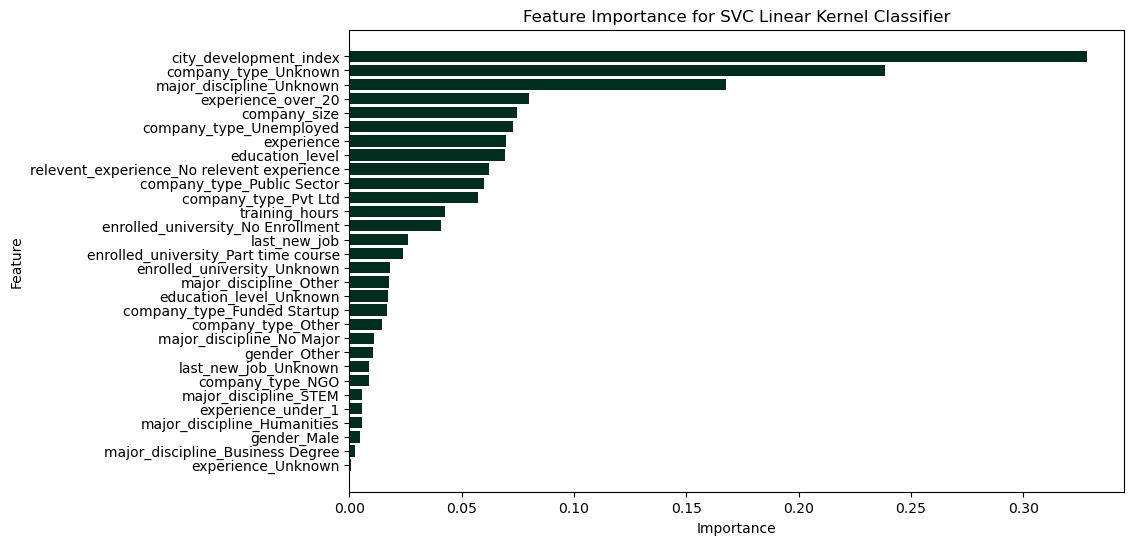

In [364]:
# 0.00인 특성 제거
importance_df_filtered = importance_df[importance_df['Importance'] != 0.00]

print(len(importance_df_filtered))

# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_filtered['Feature'], importance_df_filtered['Importance'], color='#002d1d')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for SVC Linear Kernel Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

In [365]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = linearSVC_t.best_estimator_.coef_[0]

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Importance'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Coefficient  Importance
0                       city_development_index    -0.316370    0.316370
26                        company_type_Unknown     0.150325    0.150325
3                                 company_size    -0.067709    0.067709
19                    major_discipline_Unknown    -0.067599    0.067599
27  relevent_experience_No relevent experience     0.065951    0.065951
11           enrolled_university_No Enrollment    -0.021094    0.021094
7                           experience_over_20    -0.015904    0.015904
5                               training_hours    -0.012911    0.012911
2                                   experience    -0.010317    0.010317
24                        company_type_Pvt Ltd    -0.009843    0.009843
25                     company_type_Unemployed     0.002424    0.002424
29                        company_size_Unknown     0.000000    0.000000
28                     education_level_Unkn

11


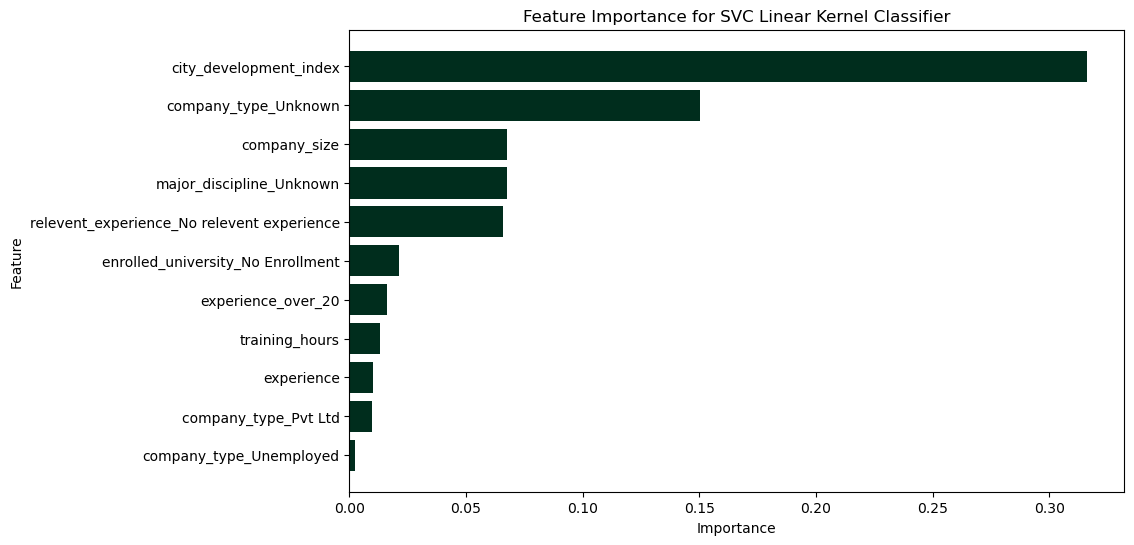

In [366]:
# 0.00인 특성 제거
importance_df_filtered = importance_df[importance_df['Importance'] != 0.00]

print(len(importance_df_filtered))

# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_filtered['Feature'], importance_df_filtered['Importance'], color='#002d1d')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for SVC Linear Kernel Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

## SVM

### sigmoid

In [ ]:
SVC_sigmoid = SVC(kernel='sigmoid')
SVC_sigmoid.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
SVC_sigmoid_prediction = SVC_sigmoid.predict(X_test_scaled)
cm_SVC_sigmoid = confusion_matrix(y_test, SVC_sigmoid_prediction)
df_SVC_sigmoid = pd.DataFrame(data=[f1_score(y_test, SVC_sigmoid_prediction), recall_score(y_test, SVC_sigmoid_prediction),
                   precision_score(y_test, SVC_sigmoid_prediction), accuracy_score(y_test, SVC_sigmoid_prediction), 
                   roc_auc_score(y_test, SVC_sigmoid_prediction)],
             columns=['SVC Sigmoid Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_sigmoid

,SVC Sigmoid Kernel Score
F1 Score,0.459344
Recall,0.622423
Precision,0.363979
Accuracy,0.629159
ROC AUC Score,0.626932


In [ ]:
params_grid = {
    'C': [10 ** k for k in range(-2, 2)], # 1.0
    'gamma': ['scale', 'auto', 0.01, 0.1, 1] # scale
}

# Initialize the GridSearchCV
SVC_sigmoid_t = GridSearchCV(SVC_sigmoid, params_grid, cv=5, scoring='f1')
SVC_sigmoid_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", SVC_sigmoid_t.best_params_)

# Predictions and evaluation
SVC_sigmoid_t_prediction = SVC_sigmoid_t.predict(X_test_scaled)
cm_SVC_sigmoid_t = confusion_matrix(y_test, SVC_sigmoid_t_prediction)
df_SVC_sigmoid_t = pd.DataFrame(data=[f1_score(y_test, SVC_sigmoid_t_prediction), recall_score(y_test, SVC_sigmoid_t_prediction),
                   precision_score(y_test, SVC_sigmoid_t_prediction), accuracy_score(y_test, SVC_sigmoid_t_prediction), 
                   roc_auc_score(y_test, SVC_sigmoid_t_prediction)],
             columns=['Tuned SVC Sigmoid Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_sigmoid_t

Best Parameters:  {'C': 0.1, 'gamma': 0.01}


,Tuned SVC Sigmoid Kernel Score
F1 Score,0.561702
Recall,0.765464
Precision,0.443615
Accuracy,0.697652
ROC AUC Score,0.720068


### Poly

In [ ]:
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
SVC_poly_prediction = SVC_poly.predict(X_test_scaled)
cm_SVC_poly = confusion_matrix(y_test, SVC_poly_prediction)
df_SVC_poly = pd.DataFrame(data=[f1_score(y_test, SVC_poly_prediction), recall_score(y_test, SVC_poly_prediction),
                   precision_score(y_test, SVC_poly_prediction), accuracy_score(y_test, SVC_poly_prediction), 
                   roc_auc_score(y_test, SVC_poly_prediction)],
             columns=['SVC Poly Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_poly

,SVC Poly Kernel Score
F1 Score,0.587034
Recall,0.740979
Precision,0.486052
Accuracy,0.736138
ROC AUC Score,0.737739


In [ ]:
params_grid = {
    'C': [10 ** k for k in range(-3, 3)],    
    # 'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    # 'degree': [2, 3, 4, 5] # 3
}

# Initialize the GridSearchCV
clf = GridSearchCV(SVC_poly, params_grid, cv=3, scoring='f1')
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
SVC_poly_t_prediction = clf.predict(X_test_scaled)
cm_SVC_poly_t = confusion_matrix(y_test, SVC_poly_t_prediction)
df_SVC_poly_t = pd.DataFrame(data=[f1_score(y_test, SVC_poly_t_prediction), recall_score(y_test, SVC_poly_t_prediction),
                   precision_score(y_test, SVC_poly_t_prediction), accuracy_score(y_test, SVC_poly_t_prediction), 
                   roc_auc_score(y_test, SVC_poly_t_prediction)],
             columns=['Tuned SVC Poly Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_poly_t

Best Parameters:  {'C': 100}


,Tuned SVC Poly Kernel Score
F1 Score,0.575615
Recall,0.708763
Precision,0.484581
Accuracy,0.735486
ROC AUC Score,0.726652


### RBF

In [ ]:
SVC_rbf = SVC(kernel='rbf')
SVC_rbf.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
SVC_RBF_prediction = SVC_rbf.predict(X_test_scaled)
cm_SVC_RBF = confusion_matrix(y_test, SVC_RBF_prediction)
df_SVC_RBF = pd.DataFrame(data=[f1_score(y_test, SVC_RBF_prediction), recall_score(y_test, SVC_RBF_prediction),
                   precision_score(y_test, SVC_RBF_prediction), accuracy_score(y_test, SVC_RBF_prediction), 
                   roc_auc_score(y_test, SVC_RBF_prediction)],
             columns=['SVC RBF Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_RBF

,SVC RBF Kernel Score
F1 Score,0.587571
Recall,0.737113
Precision,0.488471
Accuracy,0.738095
ROC AUC Score,0.737771


In [ ]:
params_grid = {
    'C': [10 ** k for k in range(-4, 4)],    
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the GridSearchCV
SVC_rbf_t = GridSearchCV(SVC_rbf, params_grid, cv=5, scoring='f1')
SVC_rbf_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", SVC_rbf_t.best_params_)

# Predictions and evaluation
SVC_RBF_t_prediction = SVC_rbf_t.predict(X_test_scaled)
cm_SVC_RBF_t = confusion_matrix(y_test, SVC_RBF_t_prediction)
df_SVC_RBF_t = pd.DataFrame(data=[f1_score(y_test, SVC_RBF_t_prediction), recall_score(y_test, SVC_RBF_t_prediction),
                   precision_score(y_test, SVC_RBF_t_prediction), accuracy_score(y_test, SVC_RBF_t_prediction), 
                   roc_auc_score(y_test, SVC_RBF_t_prediction)],
             columns=['Tuned SVC RBF Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_RBF_t

Best Parameters:  {'C': 10, 'gamma': 1}


,Tuned SVC RBF Kernel Score
F1 Score,0.431880
Recall,0.408505
Precision,0.458092
Accuracy,0.727984
ROC AUC Score,0.622375


### Linear

In [286]:
SVC_linear = SVC(kernel='linear')
SVC_linear.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
SVC_linear_prediction = SVC_linear.predict(X_test_scaled)
cm_SVC_linear = confusion_matrix(y_test, SVC_linear_prediction)
df_SVC_linear = pd.DataFrame(data=[f1_score(y_test, SVC_linear_prediction), recall_score(y_test, SVC_linear_prediction),
                   precision_score(y_test, SVC_linear_prediction), accuracy_score(y_test, SVC_linear_prediction), 
                   roc_auc_score(y_test, SVC_linear_prediction)],
             columns=['SVC Linear Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_linear

,SVC Linear Kernel Score
F1 Score,0.557223
Recall,0.765464
Precision,0.438053
Accuracy,0.692107
ROC AUC Score,0.716356


In [287]:
params_grid = {
    'C': [10 ** k for k in range(-3, 3)],
}

# Initialize the GridSearchCV
cv_strategy = StratifiedKFold(n_splits=5)
SVC_linear_t = GridSearchCV(SVC_linear, params_grid, cv=cv_strategy, scoring='f1')
SVC_linear_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", SVC_linear_t.best_params_)

# Predictions and evaluation
SVC_linear_t_prediction = SVC_linear_t.predict(X_test_scaled)
cm_SVC_linear_t = confusion_matrix(y_test, SVC_linear_t_prediction)
df_SVC_linear_t = pd.DataFrame(data=[f1_score(y_test, SVC_linear_t_prediction), recall_score(y_test, SVC_linear_t_prediction),
                   precision_score(y_test, SVC_linear_t_prediction), accuracy_score(y_test, SVC_linear_t_prediction), 
                   roc_auc_score(y_test, SVC_linear_t_prediction)],
             columns=['Tuned SVC Linear Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_linear_t

Best Parameters:  {'C': 0.1}


,Tuned SVC Linear Kernel Score
F1 Score,0.556285
Recall,0.764175
Precision,0.437316
Accuracy,0.691455
ROC AUC Score,0.715494


In [354]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = SVC_linear.coef_[0]

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Importance'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Coefficient  Importance
0                       city_development_index    -0.824850    0.824850
26                        company_type_Unknown     0.736357    0.736357
19                    major_discipline_Unknown    -0.353297    0.353297
25                     company_type_Unemployed     0.208598    0.208598
1                              education_level    -0.079439    0.079439
27  relevent_experience_No relevent experience     0.071172    0.071172
2                                   experience    -0.057571    0.057571
7                           experience_over_20    -0.049596    0.049596
12        enrolled_university_Part time course    -0.039756    0.039756
24                        company_type_Pvt Ltd     0.037216    0.037216
13                 enrolled_university_Unknown    -0.036269    0.036269
11           enrolled_university_No Enrollment    -0.035597    0.035597
23                  company_type_Public Sec

30


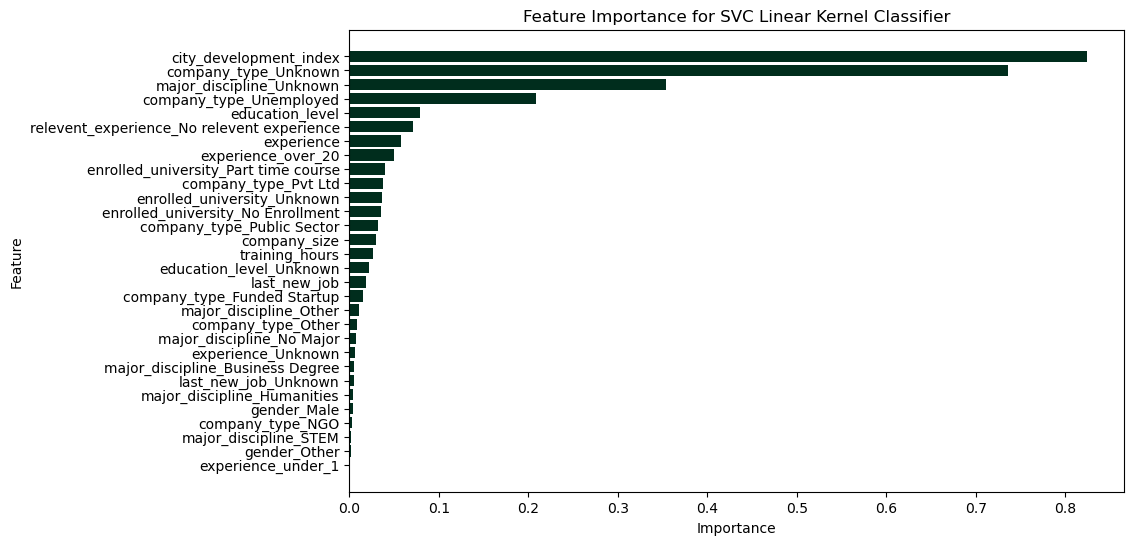

In [355]:
# 0.00인 특성 제거
importance_df_filtered = importance_df[importance_df['Importance'] != 0.00]

print(len(importance_df_filtered))

# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_filtered['Feature'], importance_df_filtered['Importance'], color='#002d1d')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for SVC Linear Kernel Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

In [356]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = SVC_linear_t.best_estimator_.coef_[0]

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Importance'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Coefficient  Importance
0                       city_development_index    -0.824086    0.824086
26                        company_type_Unknown     0.733997    0.733997
19                    major_discipline_Unknown    -0.347178    0.347178
25                     company_type_Unemployed     0.206033    0.206033
1                              education_level    -0.078850    0.078850
27  relevent_experience_No relevent experience     0.072152    0.072152
2                                   experience    -0.057912    0.057912
7                           experience_over_20    -0.050417    0.050417
12        enrolled_university_Part time course    -0.040110    0.040110
24                        company_type_Pvt Ltd     0.036543    0.036543
11           enrolled_university_No Enrollment    -0.035680    0.035680
13                 enrolled_university_Unknown    -0.035413    0.035413
23                  company_type_Public Sec

30


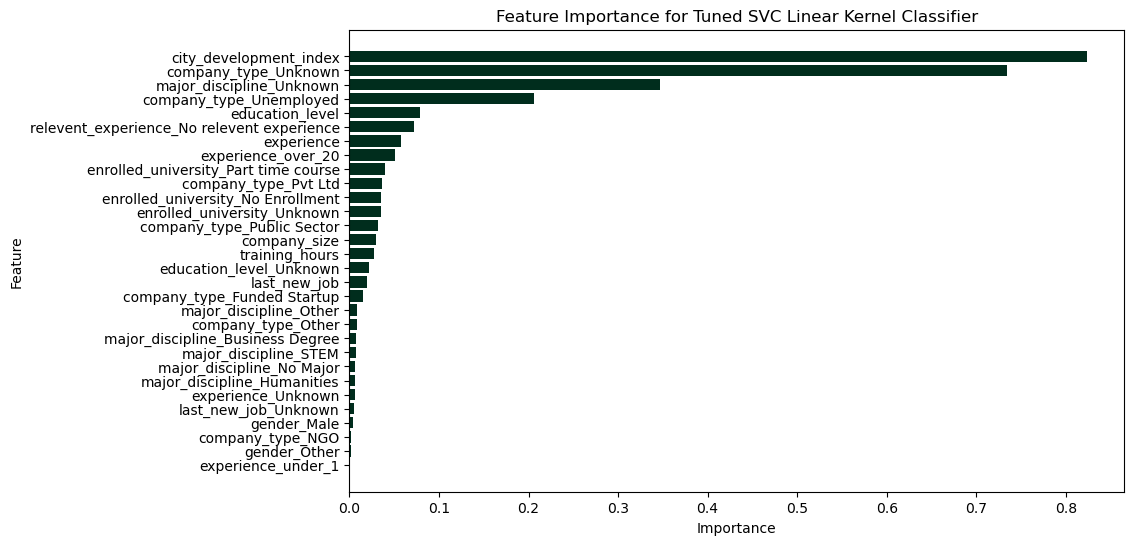

In [357]:
# 0.00인 특성 제거
importance_df_filtered = importance_df[importance_df['Importance'] != 0.00]

print(len(importance_df_filtered))

# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_filtered['Feature'], importance_df_filtered['Importance'], color='#002d1d')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Tuned SVC Linear Kernel Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

## Decision Tree

### Model

In [ ]:
dtree = DecisionTreeClassifier(random_state=123)
dtree.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
dtree_prediction = dtree.predict(X_test_scaled)
cm_dtree = confusion_matrix(y_test, dtree_prediction)
df_dtree = pd.DataFrame(data=[f1_score(y_test, dtree_prediction), recall_score(y_test, dtree_prediction),
                   precision_score(y_test, dtree_prediction), accuracy_score(y_test, dtree_prediction), 
                   roc_auc_score(y_test, dtree_prediction)],
             columns=['Decision Tree Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_dtree

,Decision Tree Score
F1 Score,0.468599
Recall,0.500000
Precision,0.440909
Accuracy,0.712981
ROC AUC Score,0.642576


In [ ]:
params_grid = {
    "max_depth": [None, 10, 20, 30, 40], # None
    "min_samples_split": [2, 10, 20, 50], # 2
    "min_samples_leaf": [1, 2, 5, 10], # 1
    "criterion": ['gini', 'entropy', 'log_loss'] # gini
}

# Initialize the GridSearchCV
dtree_t = GridSearchCV(dtree, params_grid, cv=5, scoring='f1')
dtree_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", dtree_t.best_params_)

# Predictions and evaluation
dtree_t_prediction = dtree_t.predict(X_test_scaled)
cm_dtree_t = confusion_matrix(y_test, dtree_t_prediction)
df_dtree_t = pd.DataFrame(data=[f1_score(y_test, dtree_t_prediction), recall_score(y_test, dtree_t_prediction),
                   precision_score(y_test, dtree_t_prediction), accuracy_score(y_test, dtree_t_prediction), 
                   roc_auc_score(y_test, dtree_t_prediction)],
             columns=['Tuned Decision Tree Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_dtree_t

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


,Tuned Decision Tree Score
F1 Score,0.597098
Recall,0.689433
Precision,0.526575
Accuracy,0.764514
ROC AUC Score,0.739695


### Feature Importance

In [ ]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = dtree.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Absolute Coefficient'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance  \
0                       city_development_index    0.291681   
3                                 company_size    0.167048   
5                               training_hours    0.153915   
2                                   experience    0.090256   
4                                 last_new_job    0.081244   
1                              education_level    0.035794   
27  relevent_experience_No relevent experience    0.029064   
19                    major_discipline_Unknown    0.022315   
11           enrolled_university_No Enrollment    0.016409   
9                                  gender_Male    0.015595   
10                                gender_Other    0.014736   
24                        company_type_Pvt Ltd    0.013627   
12        enrolled_university_Part time course    0.008620   
18                       major_discipline_STEM    0.007163   
23                  company_type_Public Sector   

In [ ]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = dtree_t.best_estimator_.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Absolute Coefficient'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance  \
0                       city_development_index    0.440066   
3                                 company_size    0.264829   
4                                 last_new_job    0.067303   
1                              education_level    0.046074   
27  relevent_experience_No relevent experience    0.041181   
19                    major_discipline_Unknown    0.037060   
5                               training_hours    0.031269   
2                                   experience    0.031150   
24                        company_type_Pvt Ltd    0.011563   
7                           experience_over_20    0.006700   
9                                  gender_Male    0.006291   
23                  company_type_Public Sector    0.003221   
11           enrolled_university_No Enrollment    0.003157   
12        enrolled_university_Part time course    0.001965   
21                            company_type_NGO   

## Random Forest

### Model

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
rfc_prediction = rfc.predict(X_test_scaled)
cm_rfc = confusion_matrix(y_test, rfc_prediction)
df_rfc = pd.DataFrame(data=[f1_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                   precision_score(y_test, rfc_prediction), accuracy_score(y_test, rfc_prediction), 
                   roc_auc_score(y_test, rfc_prediction)],
             columns=['Random Forest Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_rfc

,Random Forest Score
F1 Score,0.558880
Recall,0.565722
Precision,0.552201
Accuracy,0.773973
ROC AUC Score,0.705132


In [ ]:
params_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600], # 100
    'max_depth': [10, 20, 30, 40, 50, None], # None
    'min_samples_split': [2, 5, 10, 20], # 2
    #'max_features': ['sqrt', 'log2', None], # auto
}

# Initialize the GridSearchCV
rfc_t = GridSearchCV(rfc, params_grid, cv=5, scoring='f1')
rfc_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", rfc_t.best_params_)

# Predictions and evaluation
rfc_t_prediction = rfc_t.predict(X_test_scaled)
cm_rfc_t = confusion_matrix(y_test, rfc_t_prediction)
df_rfc_t = pd.DataFrame(data=[f1_score(y_test, rfc_t_prediction), recall_score(y_test, rfc_t_prediction),
                   precision_score(y_test, rfc_t_prediction), accuracy_score(y_test, rfc_t_prediction), 
                   roc_auc_score(y_test, rfc_t_prediction)],
             columns=['Tuned Random Forest Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_rfc_t

Best Parameters:  {'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 400}


,Tuned Random Forest Score
F1 Score,0.559441
Recall,0.567010
Precision,0.552070
Accuracy,0.773973
ROC AUC Score,0.705558


### Feature Importance

In [ ]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = rfc.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Absolute Coefficient'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance  \
0                       city_development_index    0.260556   
5                               training_hours    0.165438   
2                                   experience    0.116533   
3                                 company_size    0.115734   
4                                 last_new_job    0.075416   
1                              education_level    0.049687   
26                        company_type_Unknown    0.027531   
27  relevent_experience_No relevent experience    0.026339   
11           enrolled_university_No Enrollment    0.021711   
24                        company_type_Pvt Ltd    0.020698   
9                                  gender_Male    0.016651   
7                           experience_over_20    0.015321   
10                                gender_Other    0.014476   
18                       major_discipline_STEM    0.013121   
19                    major_discipline_Unknown   

In [ ]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = rfc_t.best_estimator_.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Absolute Coefficient'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance  \
0                       city_development_index    0.255461   
5                               training_hours    0.166037   
2                                   experience    0.118995   
3                                 company_size    0.111854   
4                                 last_new_job    0.078705   
1                              education_level    0.050029   
26                        company_type_Unknown    0.028091   
27  relevent_experience_No relevent experience    0.026766   
24                        company_type_Pvt Ltd    0.022691   
11           enrolled_university_No Enrollment    0.022044   
9                                  gender_Male    0.016916   
7                           experience_over_20    0.013936   
10                                gender_Other    0.013837   
18                       major_discipline_STEM    0.013378   
19                    major_discipline_Unknown   

## Logistic Regression

### Model

In [127]:
logistic = LogisticRegression()
logistic.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
log_prediction = logistic.predict(X_test_scaled)
cm_log = confusion_matrix(y_test, log_prediction)
df_log = pd.DataFrame(data=[f1_score(y_test, log_prediction), recall_score(y_test, log_prediction),
                   precision_score(y_test, log_prediction), accuracy_score(y_test, log_prediction), 
                   roc_auc_score(y_test, log_prediction)],
             columns=['Logistic Regression Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_log

,Logistic Regression Score
F1 Score,0.567951
Recall,0.721649
Precision,0.468227
Accuracy,0.722114
ROC AUC Score,0.721960


In [126]:
params_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['saga']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['saga']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}
]

# Initialize the GridSearchCV
cv_strategy = StratifiedKFold(n_splits=10)
logistic_t = GridSearchCV(logistic, params_grid, cv=cv_strategy, scoring='f1')
logistic_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", logistic_t.best_params_)

# Predictions and evaluation
rfc_t_prediction = logistic_t.predict(X_test_scaled)
cm_rfc_t = confusion_matrix(y_test, rfc_t_prediction)
df_rfc_t = pd.DataFrame(data=[f1_score(y_test, rfc_t_prediction), recall_score(y_test, rfc_t_prediction),
                   precision_score(y_test, rfc_t_prediction), accuracy_score(y_test, rfc_t_prediction), 
                   roc_auc_score(y_test, rfc_t_prediction)],
             columns=['Tuned Logistic Regression Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_rfc_t

Best Parameters:  {'C': 1, 'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga'}


,Tuned Logistic Regression Score
F1 Score,0.567951
Recall,0.721649
Precision,0.468227
Accuracy,0.722114
ROC AUC Score,0.721960


### Feature Importance

In [358]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = logistic.coef_[0]

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Importance'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Coefficient  Importance
0                       city_development_index    -0.782451    0.782451
26                        company_type_Unknown     0.590402    0.590402
19                    major_discipline_Unknown    -0.429559    0.429559
7                           experience_over_20    -0.196980    0.196980
25                     company_type_Unemployed     0.187440    0.187440
3                                 company_size    -0.186071    0.186071
1                              education_level    -0.176102    0.176102
2                                   experience    -0.171411    0.171411
23                  company_type_Public Sector     0.157861    0.157861
27  relevent_experience_No relevent experience     0.156839    0.156839
24                        company_type_Pvt Ltd     0.150440    0.150440
5                               training_hours    -0.107668    0.107668
11           enrolled_university_No Enrollm

30


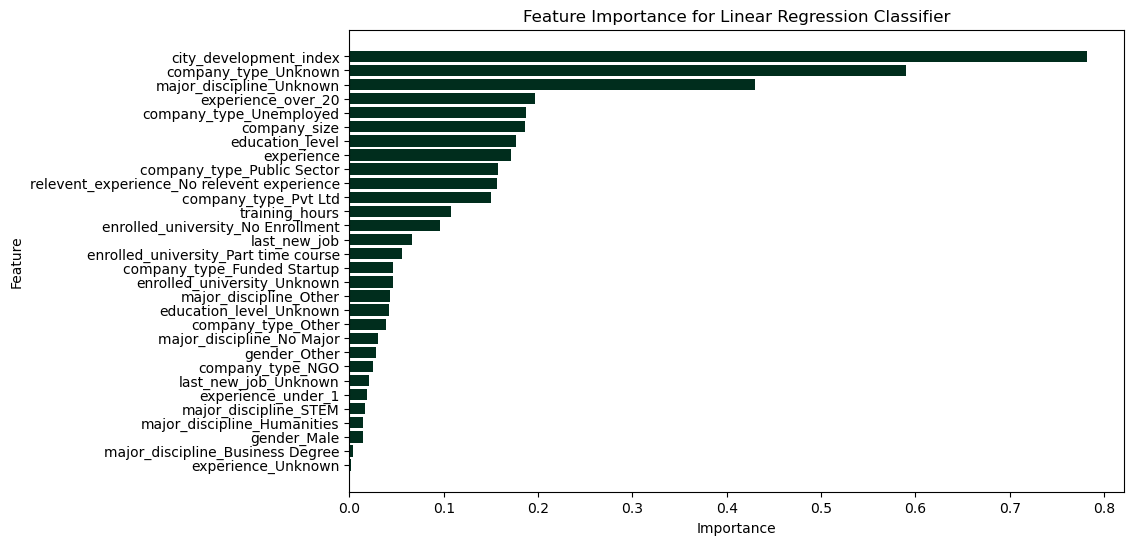

In [359]:
# 0.00인 특성 제거
importance_df_filtered = importance_df[importance_df['Importance'] != 0.00]

print(len(importance_df_filtered))

# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_filtered['Feature'], importance_df_filtered['Importance'], color='#002d1d')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

In [360]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = logistic_t.best_estimator_.coef_[0]

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Importance'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Coefficient  Importance
0                       city_development_index    -0.782138    0.782138
26                        company_type_Unknown     0.583733    0.583733
19                    major_discipline_Unknown    -0.423033    0.423033
7                           experience_over_20    -0.196008    0.196008
3                                 company_size    -0.185388    0.185388
25                     company_type_Unemployed     0.182679    0.182679
1                              education_level    -0.174907    0.174907
2                                   experience    -0.170622    0.170622
27  relevent_experience_No relevent experience     0.157022    0.157022
23                  company_type_Public Sector     0.154007    0.154007
24                        company_type_Pvt Ltd     0.142149    0.142149
5                               training_hours    -0.107373    0.107373
11           enrolled_university_No Enrollm

30


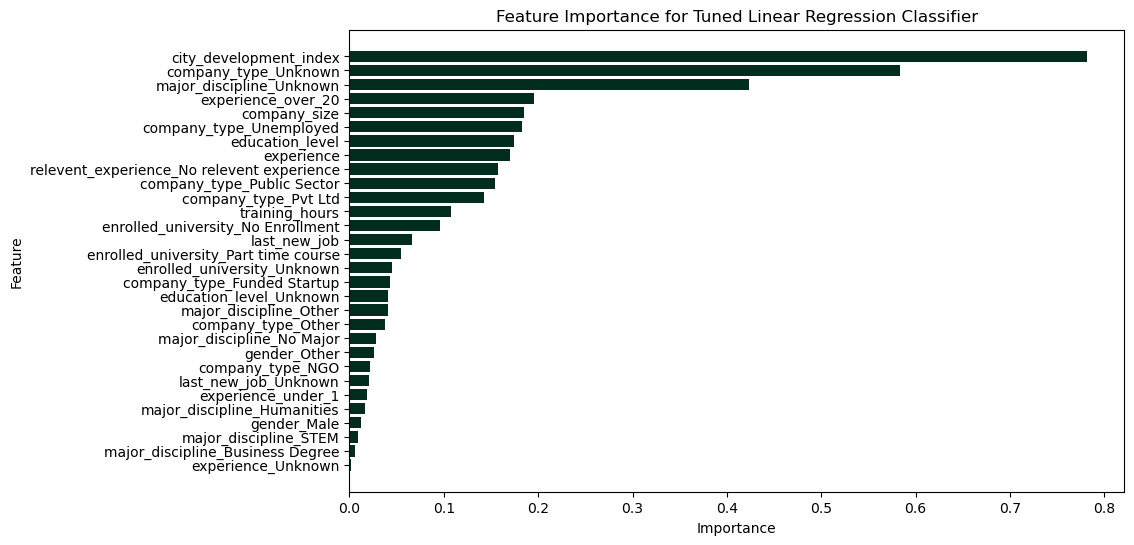

In [362]:
# 0.00인 특성 제거
importance_df_filtered = importance_df[importance_df['Importance'] != 0.00]

print(len(importance_df_filtered))

# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_filtered['Feature'], importance_df_filtered['Importance'], color='#002d1d')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Tuned Linear Regression Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

## KNN

### Model

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_prediction = knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, knn_prediction)
df_knn = pd.DataFrame(data=[f1_score(y_test, knn_prediction), recall_score(y_test, knn_prediction),
                   precision_score(y_test, knn_prediction), accuracy_score(y_test, knn_prediction), 
                   roc_auc_score(y_test, knn_prediction)],
             columns=['KNN Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_knn

,KNN Score
F1 Score,0.227891
Recall,0.172680
Precision,0.335000
Accuracy,0.703849
ROC AUC Score,0.528262


In [ ]:
# 하이퍼 파라미터 그리드 설정
params_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 17], # 5
    'weights': ['uniform', 'distance'], # uniform
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # auto
    'leaf_size': [10, 20, 30, 40, 50], # 30
    'p': [1, 2]  # 민코프스키 거리의 차수
}

# Initialize the GridSearchCV
knn_t = GridSearchCV(knn, params_grid, cv=5, scoring='f1')
knn_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", knn_t.best_params_)

# Predictions and evaluation
knn_t_prediction = knn_t.predict(X_test_scaled)
cm_knn_t = confusion_matrix(y_test, knn_t_prediction)
df_knn_t = pd.DataFrame(data=[f1_score(y_test, knn_t_prediction), recall_score(y_test, knn_t_prediction),
                   precision_score(y_test, knn_t_prediction), accuracy_score(y_test, knn_t_prediction), 
                   roc_auc_score(y_test, knn_t_prediction)],
             columns=['Tuned KNN Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_knn_t

Best Parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


,Tuned KNN Score
F1 Score,0.484069
Recall,0.557990
Precision,0.427443
Accuracy,0.698956
ROC AUC Score,0.652357


### Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

# Permutation Importance 계산
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=1)

# 결과를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,  # feature_columns 리스트 사용
    'Importance': result.importances_mean,
    'Std': result.importances_std
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance       Std
3                                 company_size    0.017776  0.003588
26                        company_type_Unknown    0.010046  0.003398
0                       city_development_index    0.006099  0.002702
27  relevent_experience_No relevent experience    0.000946  0.003295
17                      major_discipline_Other    0.000196  0.000216
21                            company_type_NGO    0.000196  0.000216
15                 major_discipline_Humanities    0.000196  0.000261
8                           experience_Unknown    0.000000  0.000000
22                          company_type_Other    0.000000  0.000000
29                        company_size_Unknown    0.000000  0.000000
16                   major_discipline_No Major    0.000000  0.000000
14            major_discipline_Business Degree   -0.000033  0.000098
12        enrolled_university_Part time course   -0.000359  0.000844
30           

In [ ]:
from sklearn.inspection import permutation_importance

# Permutation Importance 계산
result = permutation_importance(knn_t.best_estimator_, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=1)

# 결과를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,  # feature_columns 리스트 사용
    'Importance': result.importances_mean,
    'Std': result.importances_std
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance       Std
0                       city_development_index    0.052185  0.005679
25                     company_type_Unemployed    0.005088  0.001758
17                      major_discipline_Other    0.004892  0.001212
2                                   experience    0.004338  0.005921
19                    major_discipline_Unknown    0.003196  0.001270
26                        company_type_Unknown    0.002218  0.003138
18                       major_discipline_STEM    0.002153  0.001489
14            major_discipline_Business Degree    0.001892  0.001464
13                 enrolled_university_Unknown    0.001794  0.001142
7                           experience_over_20    0.001500  0.002366
6                           experience_under_1    0.001239  0.001464
15                 major_discipline_Humanities    0.001076  0.001565
11           enrolled_university_No Enrollment    0.001076  0.002222
1            

## XGBoost

### Model

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

xgb_prediction = xgb.predict(X_test_scaled)
cm_xgb = confusion_matrix(y_test, xgb_prediction)
df_xgb = pd.DataFrame(data=[f1_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                   precision_score(y_test, xgb_prediction), accuracy_score(y_test, xgb_prediction), 
                   roc_auc_score(y_test, xgb_prediction)],
             columns=['XGBoost Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_xgb

,XGBoost Score
F1 Score,0.429874
Recall,0.637887
Precision,0.324165
Accuracy,0.571755
ROC AUC Score,0.593616


In [ ]:
params_grid = {
    'n_estimators': [100, 200, 300, 400, 500], # 100
    'max_depth': [3, 5, 6, 7, 9, 11], # 6
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], # 0.3
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0] # 1.0
}

# Initialize the GridSearchCV
xgb_t = GridSearchCV(xgb, params_grid, cv=5, scoring='f1')
xgb_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", xgb_t.best_params_)

# Predictions and evaluation
xgb_t_prediction = xgb_t.predict(X_test_scaled)
cm_xgb_t = confusion_matrix(y_test, xgb_t_prediction)
df_xgb_t = pd.DataFrame(data=[f1_score(y_test, xgb_t_prediction), recall_score(y_test, xgb_t_prediction),
                   precision_score(y_test, xgb_t_prediction), accuracy_score(y_test, xgb_t_prediction), 
                   roc_auc_score(y_test, xgb_t_prediction)],
             columns=['Tuned XGBoost Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_xgb_t

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.7}


,Tuned XGBoost Score
F1 Score,0.613689
Recall,0.681701
Precision,0.558017
Accuracy,0.782779
ROC AUC Score,0.749366


### Feature Importance

In [ ]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = xgb.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance
0                       city_development_index    0.112550
3                                 company_size    0.100670
1                              education_level    0.060724
7                           experience_over_20    0.052902
27  relevent_experience_No relevent experience    0.044546
19                    major_discipline_Unknown    0.042548
26                        company_type_Unknown    0.042086
6                           experience_under_1    0.037671
10                                gender_Other    0.031776
20                 company_type_Funded Startup    0.031582
23                  company_type_Public Sector    0.031525
24                        company_type_Pvt Ltd    0.031412
11           enrolled_university_No Enrollment    0.031349
4                                 last_new_job    0.030433
25                     company_type_Unemployed    0.029251
18                       major_disc

In [ ]:
# 회귀 계수 추출 및 특성 중요도 계산
importances = xgb_t.best_estimator_.feature_importances_

# 특성 이름과 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance
19                    major_discipline_Unknown    0.253725
3                                 company_size    0.095885
0                       city_development_index    0.093910
27  relevent_experience_No relevent experience    0.043055
4                                 last_new_job    0.042963
1                              education_level    0.041519
7                           experience_over_20    0.034751
26                        company_type_Unknown    0.031722
24                        company_type_Pvt Ltd    0.026937
2                                   experience    0.024986
21                            company_type_NGO    0.021009
11           enrolled_university_No Enrollment    0.020729
22                          company_type_Other    0.020025
18                       major_discipline_STEM    0.019909
8                           experience_Unknown    0.019826
23                  company_type_Pu

## AdaBoost

### Model

In [ ]:
# 기본

adab = AdaBoostClassifier()
adab.fit(X_train,y_train)

adab_prediction = adab.predict(X_test_scaled)
cm_adab = confusion_matrix(y_test, adab_prediction)
df_adab = pd.DataFrame(data=[f1_score(y_test, adab_prediction), recall_score(y_test, adab_prediction),
                   precision_score(y_test, adab_prediction), accuracy_score(y_test, adab_prediction), 
                   roc_auc_score(y_test, adab_prediction)],
             columns=['AdaBoost Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_adab

,AdaBoost Score
F1 Score,0.404071
Recall,0.511598
Precision,0.333894
Accuracy,0.618069
ROC AUC Score,0.582873


In [ ]:
# 그리드 서치를 사용하여 최적의 매개변수를 찾기
# 파라미터 4개 모두

params_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500], # 50
    'learning_rate': [0.01, 0.1, 0.5, 1.0], # 1.0
    'algorithm': ['SAMME', 'SAMME.R'], # SAMME.R
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)] # DecisionTreeClassifier(max_depth=1)
}

# Initialize the GridSearchCV
adab_t = GridSearchCV(adab, params_grid, cv=5, scoring='f1')
adab_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", adab_t.best_params_)

# Predictions and evaluation
xgb_t_prediction = adab_t.predict(X_test_scaled)
cm_xgb_t = confusion_matrix(y_test, xgb_t_prediction)       ## 코드 오는 있지만 문제는 없음 (xgboost 아님, 코드 돌릴 때는상관은 없음)
df_xgb_t = pd.DataFrame(data=[f1_score(y_test, xgb_t_prediction), recall_score(y_test, xgb_t_prediction),
                   precision_score(y_test, xgb_t_prediction), accuracy_score(y_test, xgb_t_prediction), 
                   roc_auc_score(y_test, xgb_t_prediction)],
             columns=['Tuned AdaBoost Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_xgb_t

Best Parameters:  {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 500}


,Tuned AdaBoost Score
F1 Score,0.615819
Recall,0.702320
Precision,0.548290
Accuracy,0.778213
ROC AUC Score,0.753125


### Feature Importance

In [ ]:
## 파라미터 4개

# 최적의 모델을 얻은 후
best_model_par4 = adab_t.best_estimator_

# 회귀 계수 추출 및 특성 중요도 계산
importances_par4 = best_model_par4.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df_par4 = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances_par4
})

# 계수의 절대값 기준으로 정렬
importance_df_par4['Absolute Importance'] = importance_df_par4['Importance'].abs()
importance_df_par4 = importance_df_par4.sort_values(by='Absolute Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df_par4)


Feature Importance:
                                       Feature  Importance  \
0                       city_development_index    0.267438   
4                                 last_new_job    0.204876   
1                              education_level    0.155239   
2                                   experience    0.151486   
3                                 company_size    0.147967   
5                               training_hours    0.017315   
27  relevent_experience_No relevent experience    0.012094   
7                           experience_over_20    0.007286   
26                        company_type_Unknown    0.006148   
19                    major_discipline_Unknown    0.006009   
24                        company_type_Pvt Ltd    0.005636   
18                       major_discipline_STEM    0.005580   
11           enrolled_university_No Enrollment    0.005057   
9                                  gender_Male    0.002004   
10                                gender_Other   

In [ ]:
# 0.00인 특성 제거
importance_df_par4_filtered = importance_df_par4[importance_df_par4['Importance'] != 0.00]

# 결과 출력
print("\nNon-zero Feature Importance:")
print(importance_df_par4_filtered)


Non-zero Feature Importance:
                                       Feature  Importance  \
0                       city_development_index    0.267438   
4                                 last_new_job    0.204876   
1                              education_level    0.155239   
2                                   experience    0.151486   
3                                 company_size    0.147967   
5                               training_hours    0.017315   
27  relevent_experience_No relevent experience    0.012094   
7                           experience_over_20    0.007286   
26                        company_type_Unknown    0.006148   
19                    major_discipline_Unknown    0.006009   
24                        company_type_Pvt Ltd    0.005636   
18                       major_discipline_STEM    0.005580   
11           enrolled_university_No Enrollment    0.005057   
9                                  gender_Male    0.002004   
10                                gender

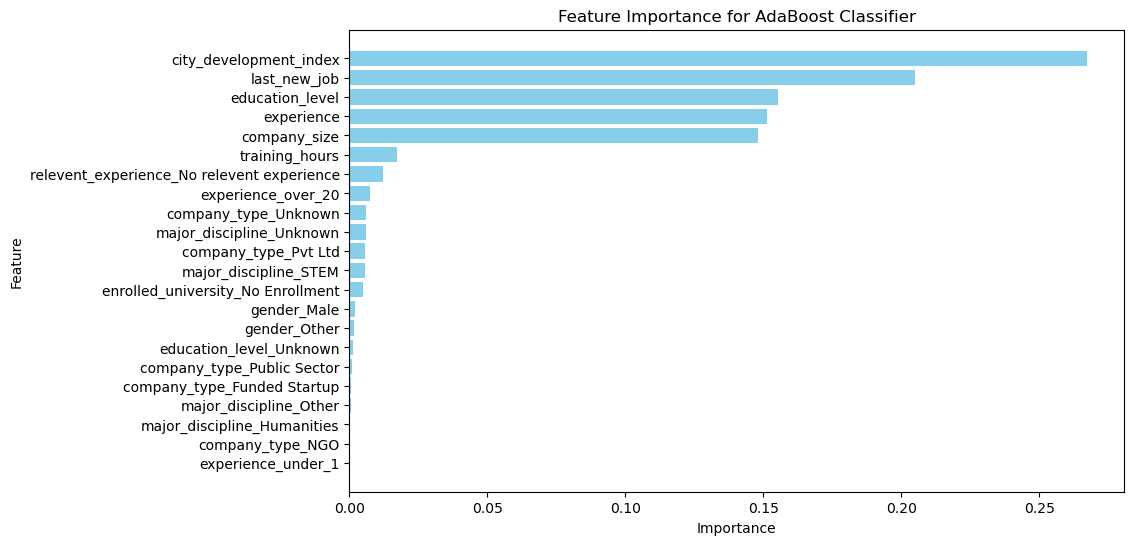

In [ ]:
# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_par4_filtered['Feature'], importance_df_par4_filtered['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for AdaBoost Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

## Naive Bayes

### Model

In [ ]:
# 기본

nb = GaussianNB()
nb.fit(X_train,y_train)

nb_prediction = nb.predict(X_test_scaled)
cm_nb = confusion_matrix(y_test, nb_prediction)
df_nb = pd.DataFrame(data=[f1_score(y_test, nb_prediction), recall_score(y_test, nb_prediction),
                   precision_score(y_test, nb_prediction), accuracy_score(y_test, nb_prediction), 
                   roc_auc_score(y_test, nb_prediction)],
             columns=['Naive Bayes Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_nb

,Naive Bayes Score
F1 Score,0.469136
Recall,0.759021
Precision,0.339481
Accuracy,0.565232
ROC AUC Score,0.629292


In [ ]:
# 그리드 서치를 사용하여 최적의 매개변수를 찾기

params_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6], # 1e-9
    'priors': [None, [0.75,0.25], [0.5,0.5], [0.25, 0.75]] # None
}

# Initialize the GridSearchCV
nb_t = GridSearchCV(nb, params_grid, cv=5, scoring='f1')
nb_t.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", nb_t.best_params_)

# Predictions and evaluation
nb_t_prediction = nb_t.predict(X_test_scaled)
cm_nb_t = confusion_matrix(y_test, nb_t_prediction)
df_nb_t = pd.DataFrame(data=[f1_score(y_test, nb_t_prediction), recall_score(y_test, nb_t_prediction),
                   precision_score(y_test, nb_t_prediction), accuracy_score(y_test, nb_t_prediction), 
                   roc_auc_score(y_test, nb_t_prediction)],
             columns=['Tuned Naive Bayes Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_nb_t

Best Parameters:  {'priors': [0.25, 0.75], 'var_smoothing': 1e-09}


,Tuned Naive Bayes Score
F1 Score,0.489967
Recall,0.676546
Precision,0.384053
Accuracy,0.643509
ROC AUC Score,0.654430


### Feature Importance

In [ ]:
## 기본모델

# 회귀 계수 추출 및 특성 중요도 계산
importances = adab.feature_importances_

# 특성 이름과 회귀 계수를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# 계수의 절대값 기준으로 정렬
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# 결과 출력
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                                       Feature  Importance  \
0                       city_development_index        0.32   
5                               training_hours        0.20   
2                                   experience        0.08   
3                                 company_size        0.08   
1                              education_level        0.06   
4                                 last_new_job        0.04   
7                           experience_over_20        0.04   
11           enrolled_university_No Enrollment        0.04   
27  relevent_experience_No relevent experience        0.02   
26                        company_type_Unknown        0.02   
25                     company_type_Unemployed        0.02   
23                  company_type_Public Sector        0.02   
17                      major_discipline_Other        0.02   
30                        last_new_job_Unknown        0.02   
6                           experience_under_1   

In [ ]:
# 0.00인 특성 제거
importance_df_filtered = importance_df[importance_df['Importance'] != 0.00]

# 결과 출력
print("\nNon-zero Feature Importance:")
print(importance_df_filtered)


Non-zero Feature Importance:
                                       Feature  Importance  \
0                       city_development_index        0.32   
5                               training_hours        0.20   
2                                   experience        0.08   
3                                 company_size        0.08   
1                              education_level        0.06   
4                                 last_new_job        0.04   
7                           experience_over_20        0.04   
11           enrolled_university_No Enrollment        0.04   
27  relevent_experience_No relevent experience        0.02   
26                        company_type_Unknown        0.02   
25                     company_type_Unemployed        0.02   
23                  company_type_Public Sector        0.02   
17                      major_discipline_Other        0.02   
30                        last_new_job_Unknown        0.02   
6                           experience_u

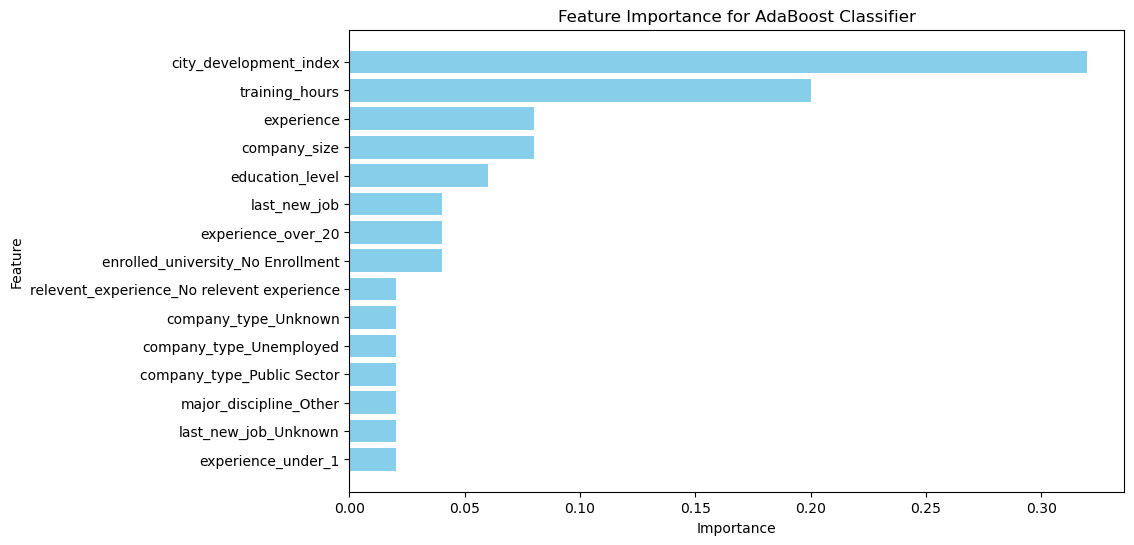

In [ ]:
# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df_filtered['Feature'], importance_df_filtered['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for AdaBoost Classifier')
plt.gca().invert_yaxis()  # 특성을 중요도가 높은 순으로 정렬하기 위해 y 축 반전
plt.show()

# Test Data

In [343]:
# Assume 'target' is the target column and the rest are features
X_new_test = new_data_df.drop(columns=['target'])
y_new_test = new_data_df['target']

# Convert to numpy arrays for consistency
X_new_test_array = X_new_test.values

# 전처리 (Scaling) 적용
X_new_test_scaled = scaler.transform(X_new_test_array)

In [344]:
def test_data(model, model_t):
    prediction = model.predict(X_new_test_scaled)
    prediction_t = model_t.predict(X_new_test_scaled)

    cm_new = confusion_matrix(y_new_test, prediction)
    df_new = pd.DataFrame(
        data=[
            f1_score(y_new_test, prediction),
            recall_score(y_new_test, prediction),
            precision_score(y_new_test, prediction),
            accuracy_score(y_new_test, prediction),
            roc_auc_score(y_new_test, prediction)
        ],
        columns=[f'{model} Score'],
        index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"]
    )

    cm_new_t = confusion_matrix(y_new_test, prediction_t)
    df_new_t = pd.DataFrame(
        data=[
            f1_score(y_new_test, prediction_t),
            recall_score(y_new_test, prediction_t),
            precision_score(y_new_test, prediction_t),
            accuracy_score(y_new_test, prediction_t),
            roc_auc_score(y_new_test, prediction_t)
        ],
        columns=[f'Tuned {model_t} Score'],
        index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"]
    )

    # 결과 출력
    print("Model result")
    print(cm_new)
    print(df_new)

    # 결과 출력
    print("Tuned Model result")
    print(cm_new_t)
    print(df_new_t)


## Test 결과

In [349]:
test_data(linearSVC, linearSVC_t.best_estimator_)

Model result
[[2094  765]
 [ 265  708]]
               LinearSVC(dual=False, max_iter=10000, random_state=123) Score
F1 Score                                                0.578904            
Recall                                                  0.727646            
Precision                                               0.480652            
Accuracy                                                0.731211            
ROC AUC Score                                           0.730035            
Tuned Model result
[[2023  836]
 [ 241  732]]
               Tuned LinearSVC(C=0.001, dual=False, max_iter=10000, penalty='l1', random_state=123) Score
F1 Score                                                0.576151                                         
Recall                                                  0.752312                                         
Precision                                               0.466837                                         
Accuracy                    

In [ ]:
test_data(SVC_sigmoid, SVC_sigmoid_t)

Model result
[[1755 1104]
 [ 382  591]]
               SVC(kernel='sigmoid') Score
F1 Score                          0.443028
Recall                            0.607400
Precision                         0.348673
Accuracy                          0.612213
ROC AUC Score                     0.610625
Tuned Model result
[[1967  892]
 [ 225  748]]
               Tuned GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),\n             param_grid={'C': [0.01, 0.1, 1, 10],\n                         'gamma': ['scale', 'auto', 0.01, 0.1, 1]},\n             scoring='f1') Score
F1 Score                                                0.572522                                                                                                                                                                  
Recall                                                  0.768756                                                                                                                                          

In [ ]:
test_data(SVC_poly, clf.best_estimator_)

Model result
[[2103  756]
 [ 252  721]]
               SVC(kernel='poly') Score
F1 Score                       0.588571
Recall                         0.741007
Precision                      0.488152
Accuracy                       0.736952
ROC AUC Score                  0.738290
Tuned Model result
[[2129  730]
 [ 295  678]]
               Tuned SVC(C=100, kernel='poly') Score
F1 Score                                    0.569509
Recall                                      0.696814
Precision                                   0.481534
Accuracy                                    0.732516
ROC AUC Score                               0.720740


In [ ]:
test_data(SVC_rbf, SVC_rbf_t.best_estimator_)

Model result
[[2121  738]
 [ 241  732]]
               SVC() Score
F1 Score          0.599263
Recall            0.752312
Precision         0.497959
Accuracy          0.744520
ROC AUC Score     0.747090
Tuned Model result
[[2408  451]
 [ 578  395]]
               Tuned SVC(C=10, gamma=1) Score
F1 Score                             0.434305
Recall                               0.405961
Precision                            0.466903
Accuracy                             0.731472
ROC AUC Score                        0.624107


In [345]:
test_data(SVC_linear, SVC_linear_t.best_estimator_)

Model result
[[1950  909]
 [ 222  751]]
               SVC(kernel='linear') Score
F1 Score                         0.570452
Recall                           0.771840
Precision                        0.452410
Accuracy                         0.704854
ROC AUC Score                    0.726948
Tuned Model result
[[1949  910]
 [ 222  751]]
               Tuned SVC(C=0.1, kernel='linear') Score
F1 Score                                      0.570235
Recall                                        0.771840
Precision                                     0.452137
Accuracy                                      0.704593
ROC AUC Score                                 0.726773


In [ ]:
test_data(dtree,dtree_t)

Model result
[[2272  587]
 [ 481  492]]
               DecisionTreeClassifier(random_state=123) Score
F1 Score                                             0.479532
Recall                                               0.505653
Precision                                            0.455978
Accuracy                                             0.721294
ROC AUC Score                                        0.650168
Tuned Model result
[[2284  575]
 [ 303  670]]
               Tuned GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),\n             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],\n                         'max_depth': [None, 10, 20, 30, 40],\n                         'min_samples_leaf': [1, 2, 5, 10],\n                         'min_samples_split': [2, 10, 20, 50]},\n             scoring='f1') Score
F1 Score                                                0.604148                                                                                           

In [ ]:
test_data(rfc, rfc_t)

Model result
[[2434  425]
 [ 435  538]]
               RandomForestClassifier() Score
F1 Score                             0.555785
Recall                               0.552929
Precision                            0.558671
Accuracy                             0.775574
ROC AUC Score                        0.702138
Tuned Model result
[[2434  425]
 [ 427  546]]
               Tuned GridSearchCV(cv=5, estimator=RandomForestClassifier(),\n             param_grid={'max_depth': [10, 20, 30, 40, 50, None],\n                         'min_samples_split': [2, 5, 10, 20],\n                         'n_estimators': [100, 200, 300, 400, 500, 600]},\n             scoring='f1') Score
F1 Score                                                0.561728                                                                                                                                                                                                                                                          
Recall  

In [350]:
test_data(logistic, logistic_t.best_estimator_)

Model result
[[2080  779]
 [ 255  718]]
               LogisticRegression() Score
F1 Score                         0.581377
Recall                           0.737924
Precision                        0.479626
Accuracy                         0.730167
ROC AUC Score                    0.732726
Tuned Model result
[[2080  779]
 [ 256  717]]
               Tuned LogisticRegression(C=1, penalty='l1', solver='saga') Score
F1 Score                                                0.580802               
Recall                                                  0.736896               
Precision                                               0.479278               
Accuracy                                                0.729906               
ROC AUC Score                                           0.732212               


In [ ]:
test_data(knn, knn_t.best_estimator_)

Model result
[[2531  328]
 [ 828  145]]
               KNeighborsClassifier() Score
F1 Score                           0.200553
Recall                             0.149024
Precision                          0.306554
Accuracy                           0.698330
ROC AUC Score                      0.517149
Tuned Model result
[[2117  742]
 [ 428  545]]
               Tuned KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1, weights='distance') Score
F1 Score                                                0.482301                                     
Recall                                                  0.560123                                     
Precision                                               0.423465                                     
Accuracy                                                0.694676                                     
ROC AUC Score                                           0.650296                                     


In [ ]:
test_data(xgb, xgb_t.best_estimator_)

Model result
[[1586 1273]
 [ 326  647]]
               XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=None, n_jobs=None,\n              num_parallel_tree=None, random_state=None, ...) Score
F1 Score                                                0.447287                                                                                                           

In [ ]:
test_data(adab, adab_t.best_estimator_)

Model result
[[1849 1010]
 [ 433  540]]
               AdaBoostClassifier() Score
F1 Score                         0.428062
Recall                           0.554985
Precision                        0.348387
Accuracy                         0.623434
ROC AUC Score                    0.600857
Tuned Model result
[[2339  520]
 [ 287  686]]
               Tuned AdaBoostClassifier(algorithm='SAMME',\n                   base_estimator=DecisionTreeClassifier(max_depth=2),\n                   learning_rate=0.5, n_estimators=500) Score
F1 Score                                                0.629647                                                                                                                                 
Recall                                                  0.705036                                                                                                                                 
Precision                                               0.568823                

In [ ]:
test_data(nb, nb_t)

Model result
[[1399 1460]
 [ 218  755]]
               GaussianNB() Score
F1 Score                 0.473651
Recall                   0.775951
Precision                0.340858
Accuracy                 0.562109
ROC AUC Score            0.632641
Tuned Model result
[[1817 1042]
 [ 273  700]]
               Tuned GridSearchCV(cv=5, estimator=GaussianNB(),\n             param_grid={'priors': [None, [0.75, 0.25], [0.5, 0.5],\n                                    [0.25, 0.75]],\n                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},\n             scoring='f1') Score
F1 Score                                                0.515654                                                                                                                                                                                                                                    
Recall                                                  0.719424                                                            